In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import textwrap
from pathlib import Path

results_output_path = Path('../results/data_intro/')
results_output_path.joinpath('figures').mkdir(parents=True, exist_ok=True)

Data Descriptions with explanations of columns
* **[U.S. DOT T-100 International Market Data](https://www.opendatanetwork.com/dataset/datahub.transportation.gov/xgub-n9bw)**: The primary source for monthly passenger counts on international routes to/from the United States. Accessed via the Socrata Open Data API.
* **[OurAirports Data](https://davidmegginson.github.io/ourairports-data/)**: A comprehensive database of global airports, used to enrich the flight data with geographic details like country codes, continents, and GPS coordinates.
* **[World Bank Open Data](https://data.worldbank.org/)**: Provides country-level, year-appropriate economic and demographic indicators, such as GDP and population. Accessed via the `wbgapi` Python package.

In [2]:
parquet_path = "../data/T100_International/final_enriched_data.parquet"
df = pd.read_parquet(parquet_path)
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])
df

Number of rows: 808332
Number of columns: 59


data_dte  year  month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0      1990-12-01  1990     12       11697     FLL       33      16217    YUL   
1      1990-12-01  1990     12       13204     MCO       33      16271    YYZ   
2      1990-12-01  1990     12       14112     PIE       33      16271    YYZ   
3      1990-12-01  1990     12       11697     FLL       33      16271    YYZ   
4      1990-12-01  1990     12       11618     EWR       21      13605    NAS   
...           ...   ...    ...         ...     ...      ...        ...    ...   
808327 2024-09-01  2024      9       12478     JFK       22      12972    LHR   
808328 2024-07-01  2024      7       12478     JFK       22      12972    LHR   
808329 2024-05-01  2024      5       12478     JFK       22      12972    LHR   
808330 2024-06-01  2024      6       12478     JFK       22      12972    LHR   
808331 2024-10-01  2024     10       12478     JFK       22      12972    LHR   

        fg_wac  airlineid  ... fg_remittances_received fg_inflation_cp  \
0          941      19531  ...            4.864501e+08        4.780477   
1          936      19523  ...            4.864501e+08        4.780477   
2          936      20116  ...            4.864501e+08        4.780477   
3          936      19531  ...            4.864501e+08        4.780477   
4          204      19704  ...            5.080571e+07        3.198781   
...        ...        ...  ...                     ...             ...   
808327     493      19540  ...            4.833962e+09        3.271573   
808328     493      19540  ...            4.833962e+09        3.271573   
808329     493      19540  ...            4.833962e+09        3.271573   
808330     493      19540  ...            4.833962e+09        3.271573   
808331     493      19540  ...            4.833962e+09        3.271573   

       fg_air_departures        fg_gdp  fg_gdp_per_capita  \
0               346800.0  5.960756e+11       21525.861139   
1               346800.0  5.960756e+11       21525.861139   
2               346800.0  5.960756e+11       21525.861139   
3               346800.0  5.960756e+11       21525.861139   
4                18900.0  3.166000e+09       11473.300839   
...                  ...           ...                ...   
808327          289731.0  3.643834e+12       52636.786594   
808328          289731.0  3.643834e+12       52636.786594   
808329          289731.0  3.643834e+12       52636.786594   
808330          289731.0  3.643834e+12       52636.786594   
808331          289731.0  3.643834e+12       52636.786594   

        fg_USD_exchange_rate fg_population fg_tourism_arrivals  \
0                   1.166774    27691138.0          41657000.0   
1                   1.166774    27691138.0          41657000.0   
2                   1.166774    27691138.0          41657000.0   
3                   1.166774    27691138.0          41657000.0   
4                   1.000000      275945.0           3239000.0   
...                      ...           ...                 ...   
808327              0.782415    69226000.0          11101000.0   
808328              0.782415    69226000.0          11101000.0   
808329              0.782415    69226000.0          11101000.0   
808330              0.782415    69226000.0          11101000.0   
808331              0.782415    69226000.0          11101000.0   

       fg_trade_pct_gdp  jet_fuel_price  
0             42.087447        0.761889  
1             42.087447        0.761889  
2             42.087447        0.761889  
3             42.087447        0.761889  
4             42.640556        0.761889  
...                 ...             ...  
808327        36.467439        2.337250  
808328        36.467439        2.337250  
808329        36.467439        2.337250  
808330        36.467439        2.337250  
808331        36.467439        2.337250  

[808332 rows x 59 columns]

In [3]:
pd.DataFrame({'Count of Nulls': df.isna().sum(),'Dtype': df.dtypes})

Count of Nulls           Dtype
data_dte                               0  datetime64[ns]
year                                   0           int64
month                                  0           int64
usg_apt_id                             0           int64
usg_apt                                0          object
usg_wac                                0           int64
fg_apt_id                              0           int64
fg_apt                                 0          object
fg_wac                                 0           int64
airlineid                              0           int64
carrier                                0          object
carriergroup                           0          object
type                                   0          object
scheduled                              0           int64
charter                                0           int64
total                                  0           int64
usg_airport_name                    1366          object
usg_airport_type                    1366          object
usg_country_name                    1366          object
usg_latitude_deg                    1366         float64
usg_longitude_deg                   1366         float64
usg_elevation_ft                    1366         float64
usg_continent                       1366          object
usg_iso_country                     1366          object
usg_iso_region                      1366          object
usg_municipality                    1366          object
fg_airport_name                     1884          object
fg_airport_type                     1884          object
fg_country_name                     1884          object
fg_latitude_deg                     1884         float64
fg_longitude_deg                    1884         float64
fg_elevation_ft                     1927         float64
fg_continent                        1884          object
fg_iso_country                      1884          object
fg_iso_region                       1884          object
fg_municipality                     1924          object
usg_iso_country_alpha3              1366          object
fg_iso_country_alpha3               1897          object
usg_remittances_paid               35761         float64
usg_remittances_received           35758         float64
usg_inflation_cp                   35758         float64
usg_air_departures                 23935         float64
usg_gdp                             1391         float64
usg_gdp_per_capita                  1391         float64
usg_USD_exchange_rate               1391         float64
usg_population                      1391         float64
usg_tourism_arrivals                1391         float64
usg_trade_pct_gdp                  19889         float64
fg_remittances_paid                24668         float64
fg_remittances_received            24687         float64
fg_inflation_cp                    34243         float64
fg_air_departures                  50339         float64
fg_gdp                             14110         float64
fg_gdp_per_capita                  14110         float64
fg_USD_exchange_rate               21002         float64
fg_population                      12481         float64
fg_tourism_arrivals                12696         float64
fg_trade_pct_gdp                   14116         float64
jet_fuel_price                         0         float64

In [4]:
df[df['usg_airport_name'].isna()].groupby('usg_apt')['total'].sum().sort_values(ascending=False)
# JON is for Johnston Atoll Aiport which is a US military base in the Pacific Ocean which stopped operating in 2005.
# ZZZ is for unknown airport code, likely in Alaska territory.

usg_apt
JON    245304
ZZZ     21366
DQF      4894
DQK      4492
NC1      2613
        ...  
JDX         1
NY7         1
S24         1
VUO         1
WA5         1
Name: total, Length: 96, dtype: int64

In [5]:
df[df['fg_airport_name'].isna()].groupby('fg_apt')['total'].sum().sort_values(ascending=False)
# PID is for a private airport on Paradise Island in the Bahamas that closed in 1999.

fg_apt
PID    103853
HOW     64413
YCJ     53082
CSL     34427
FRF     30610
        ...  
B2C         1
ALL         1
ON2         1
QC1         1
SGJ         1
Name: total, Length: 106, dtype: int64

In [6]:
df['usg_airport_label'] = df['usg_airport_name'] + ' (' + df['usg_apt'] + ')'
df['fg_airport_label'] = df['fg_airport_name'] + ' (' + df['fg_apt'] + ')'

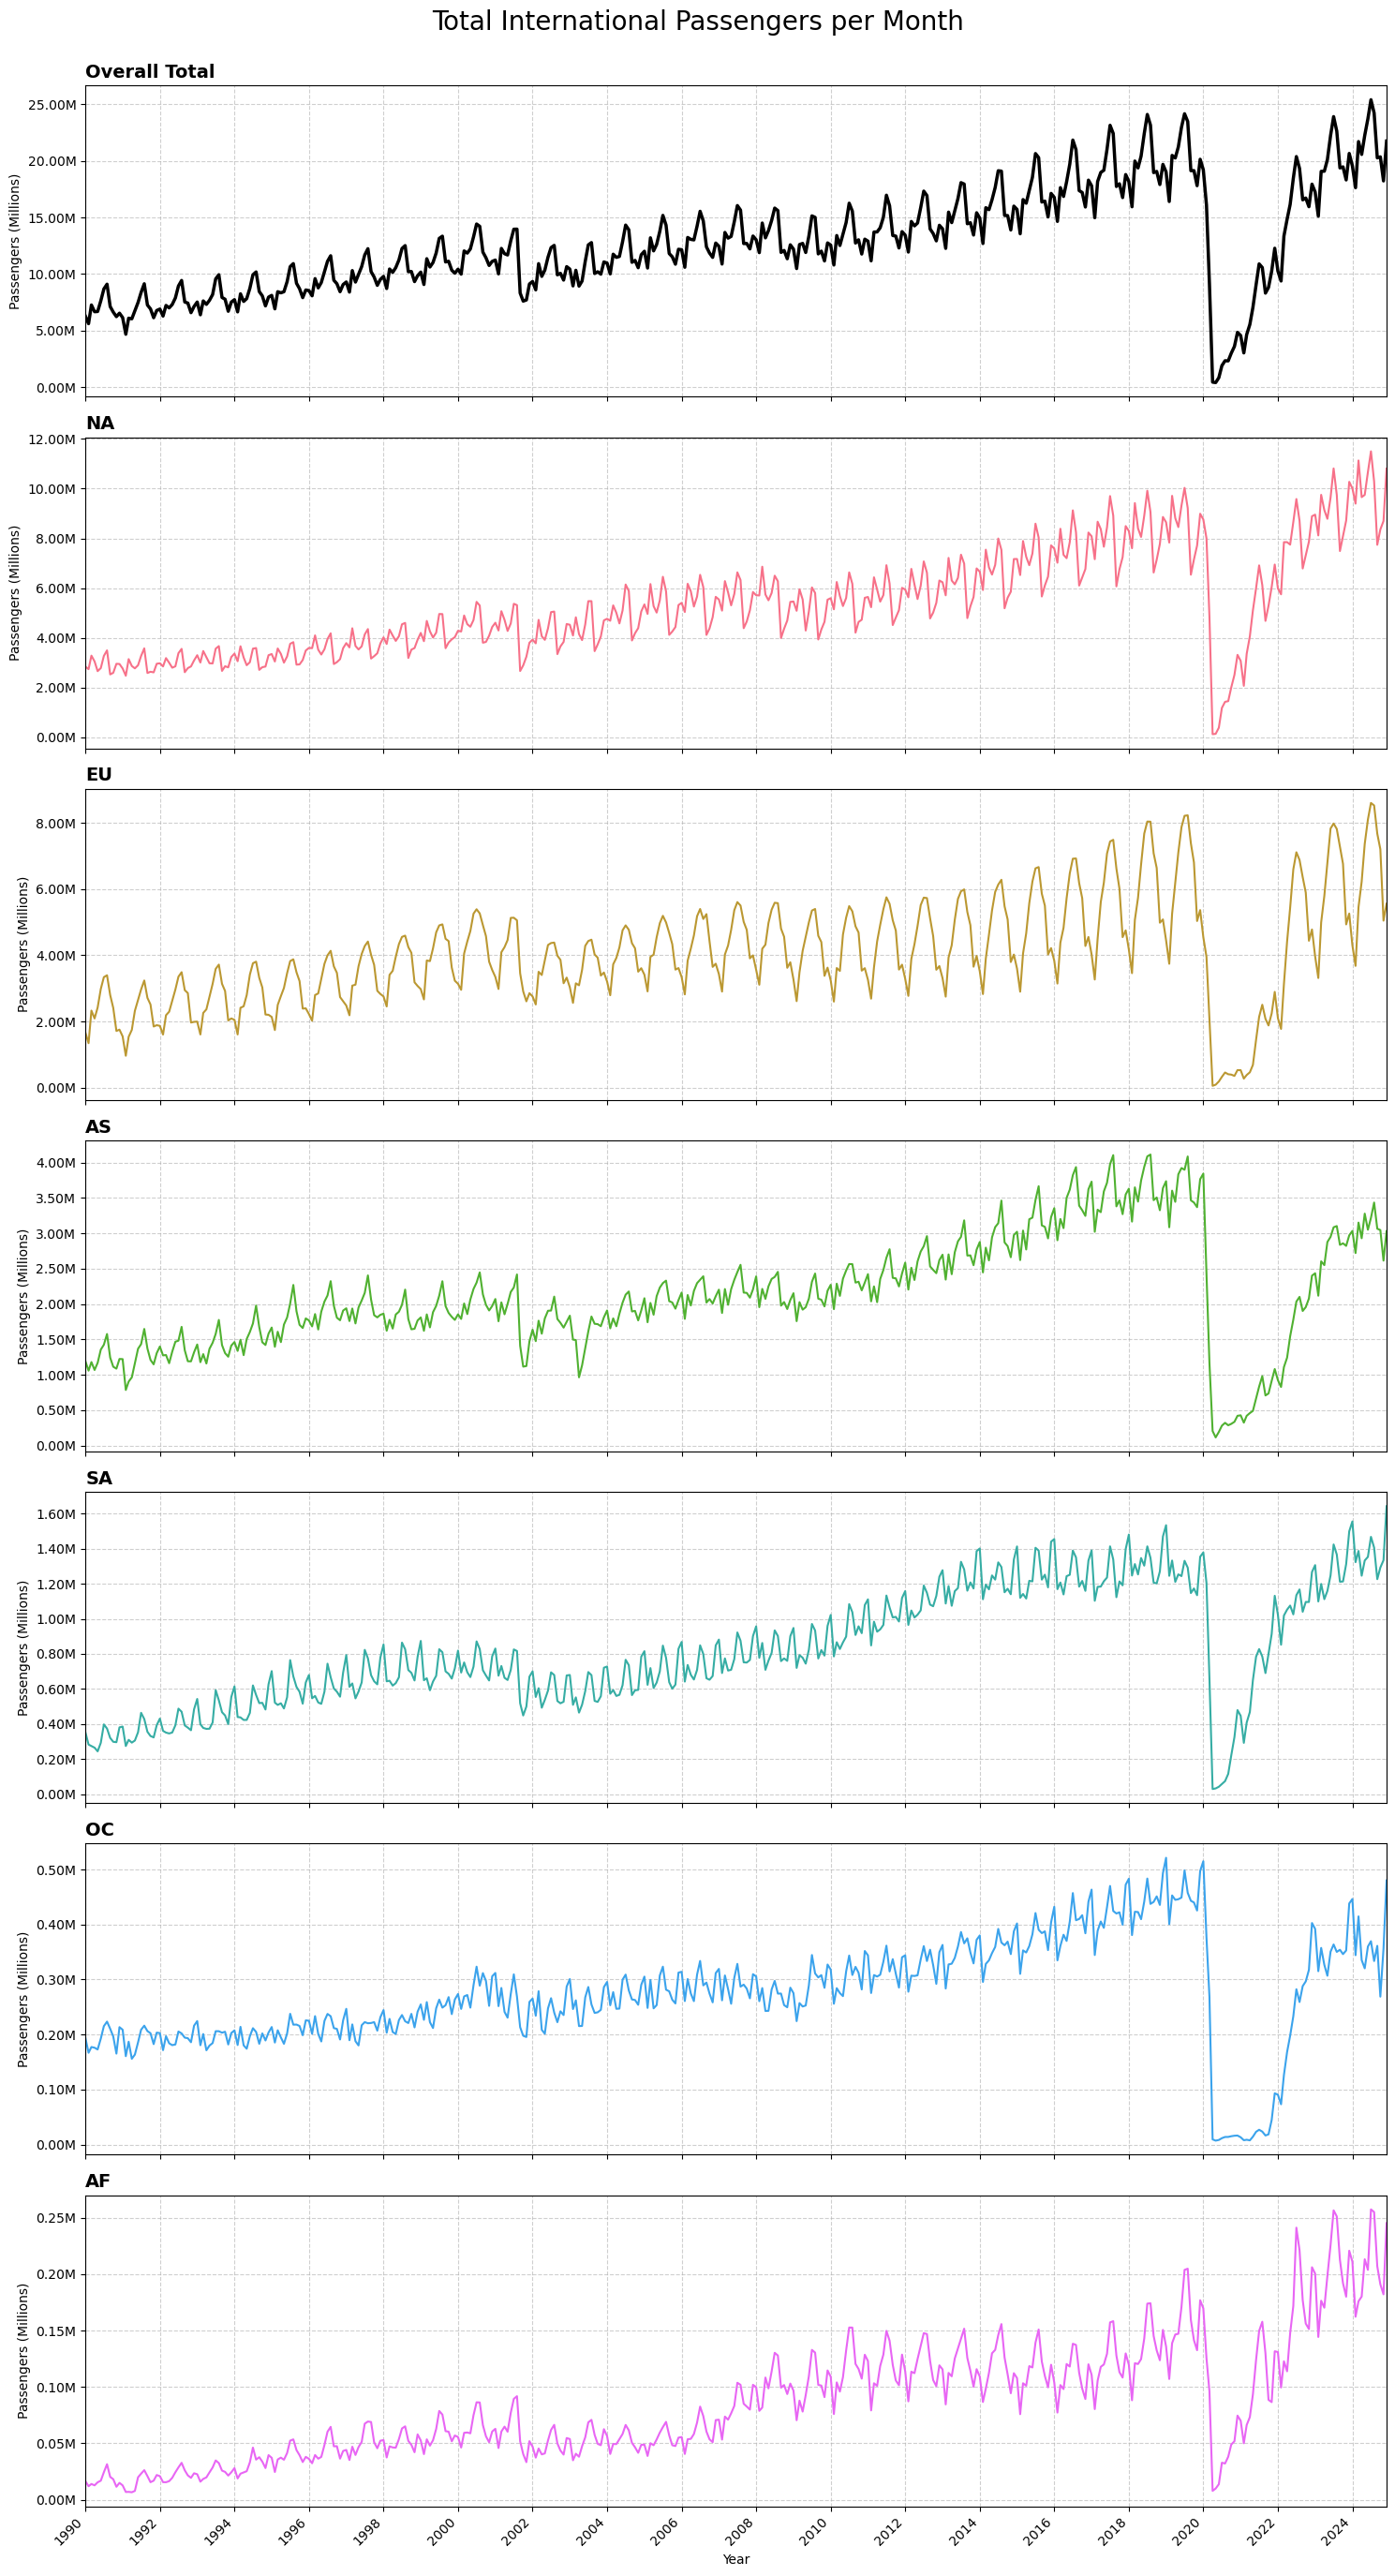

In [7]:
# Get overall totals by month
pax_total_month = df.groupby('data_dte')['total'].sum()

# Get totals by month and continent
pax_by_continent_month = df.groupby(['data_dte', 'fg_continent'])['total'].sum().reset_index()

# Get a sorted list of continents for plotting order
continents = pax_by_continent_month.groupby('fg_continent')['total'].sum().sort_values(ascending=False).index.tolist()
num_continents = len(continents)

# --- 2. Create the Subplots ---
# Create N+1 rows: one for the total and one for each continent
fig, axes = plt.subplots(
    num_continents + 1, 
    1, 
    figsize=(15, 4 * (num_continents + 1)), 
    sharex=True  # Share the x-axis for alignment
)
fig.suptitle('Total International Passengers per Month', fontsize=20, y=0.98)

# Define a color palette
palette = sns.color_palette("husl", num_continents)

# --- 3. Plot the Overall Total (Top Plot) ---
ax_total = axes[0]
sns.lineplot(data=pax_total_month, ax=ax_total, color='black', linewidth=2.5)
ax_total.set_title("Overall Total", loc='left', fontsize=14, fontweight='bold')

# --- 4. Loop Through Continents and Create Subplots ---
for i, continent in enumerate(continents):
    ax = axes[i + 1]
    continent_data = pax_by_continent_month[pax_by_continent_month['fg_continent'] == continent]
    
    # Plot the data for the current continent with a unique color
    sns.lineplot(data=continent_data, x='data_dte', y='total', ax=ax, color=palette[i])
    ax.set_title(continent, loc='left', fontsize=14, fontweight='bold')

# --- 5. Format All Axes ---
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.2f}M')

for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Passengers (Millions)')
    ax.set_xlabel(None)  # Remove individual x-labels to avoid clutter
    ax.grid(True, linestyle='--', alpha=0.6)

# --- 6. Final Touches ---
# Set shared x-axis properties on the last plot
last_ax = axes[-1]
last_ax.set_xlim(df['data_dte'].min(), df['data_dte'].max())
last_ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
last_ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
last_ax.set_xlabel('Year')
plt.setp(last_ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout for suptitle
plt.savefig(results_output_path / 'figures' / 'total_passengers_per_month_per_continent.png', dpi=300)

15:43:32 - cmdstanpy - INFO - Chain [1] start processing
15:43:32 - cmdstanpy - INFO - Chain [1] done processing
15:43:32 - cmdstanpy - INFO - Chain [1] start processing
15:43:32 - cmdstanpy - INFO - Chain [1] done processing
15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing
15:43:33 - cmdstanpy - INFO - Chain [1] start processing
15:43:33 - cmdstanpy - INFO - Chain [1] done processing


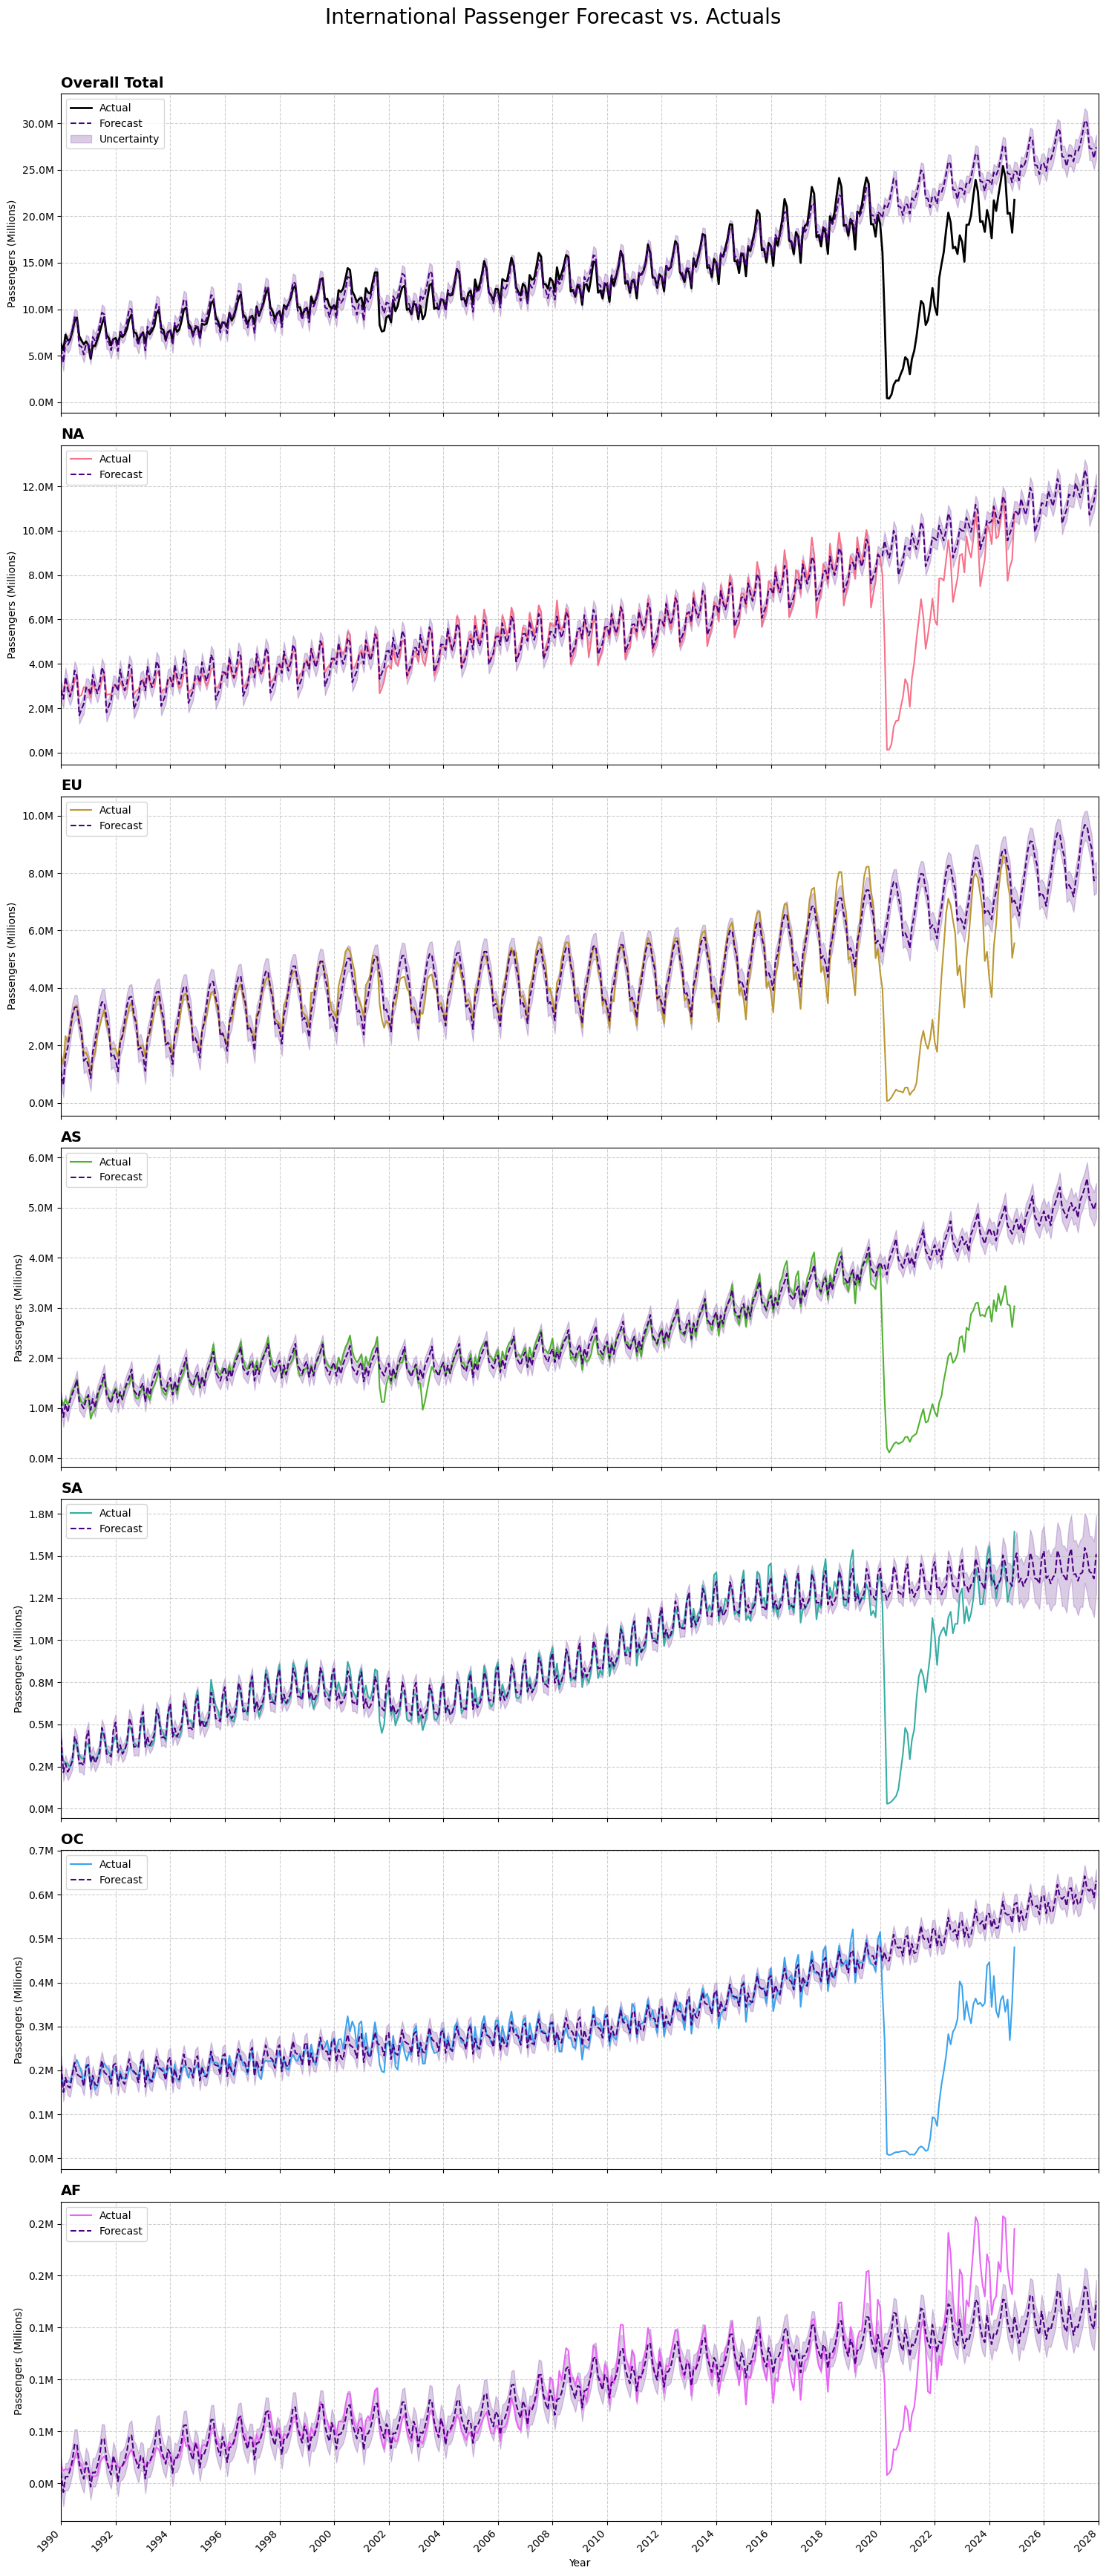

In [19]:
from prophet import Prophet

def train_and_forecast(df_timeseries: pd.DataFrame) -> pd.DataFrame:
    """
    Trains a Prophet model on pre-2020 data and forecasts from 2020-2027.
    
    Args:
        df_timeseries: A DataFrame with 'data_dte' and 'total' columns.

    Returns:
        A DataFrame containing the forecast and uncertainty intervals.
    """
    # Prophet requires columns to be named 'ds' (datestamp) and 'y' (value)
    prophet_df = df_timeseries.rename(columns={'data_dte': 'ds', 'total': 'y'})
    
    # Split the data into training (pre-2020) and historical (post-2020)
    train_df = prophet_df[prophet_df['ds'] < '2020-01-01']
    
    # Initialize and train the model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train_df)
    
    # Create a future DataFrame to predict on, extending to the end of 2027
    future_dates = model.make_future_dataframe(periods=8 * 12, freq='ME')
    
    # Generate the forecast
    forecast_df = model.predict(future_dates)
    
    return forecast_df

# --- MAIN PLOTTING SCRIPT ---

# 1. Prepare Data
pax_total_month = df.groupby('data_dte')['total'].sum().reset_index()
pax_by_continent_month = df.groupby(['data_dte', 'fg_continent'])['total'].sum().reset_index()
continents = pax_by_continent_month.groupby('fg_continent')['total'].sum().sort_values(ascending=False).index.tolist()
num_continents = len(continents)

# 2. Create the Subplots
fig, axes = plt.subplots(num_continents + 1, 1, figsize=(15, 5 * (num_continents + 1)), sharex=True)
fig.suptitle('International Passenger Forecast vs. Actuals', fontsize=20, y=0.99)
palette = sns.color_palette("husl", num_continents)

# --- 3. Plot the Overall Total and Forecast ---
ax_total = axes[0]
forecast_total = train_and_forecast(pax_total_month)

# Plot actual data
sns.lineplot(data=pax_total_month, x='data_dte', y='total', ax=ax_total, color='black', linewidth=2, label='Actual')
# Plot forecast
sns.lineplot(data=forecast_total, x='ds', y='yhat', ax=ax_total, color='indigo', linestyle='--', label='Forecast')
# Plot uncertainty interval
ax_total.fill_between(forecast_total['ds'], forecast_total['yhat_lower'], forecast_total['yhat_upper'], color='indigo', alpha=0.2, label='Uncertainty')

ax_total.set_title("Overall Total", loc='left', fontsize=14, fontweight='bold')
ax_total.legend()

# --- 4. Loop Through Continents and Create Subplots with Forecasts ---
for i, continent in enumerate(continents):
    ax = axes[i + 1]
    continent_data = pax_by_continent_month[pax_by_continent_month['fg_continent'] == continent]
    
    # Generate forecast for this continent
    forecast_continent = train_and_forecast(continent_data)
    
    # Plot actual data
    sns.lineplot(data=continent_data, x='data_dte', y='total', ax=ax, color=palette[i], label='Actual')
    # Plot forecast
    sns.lineplot(data=forecast_continent, x='ds', y='yhat', ax=ax, color='indigo', linestyle='--', label='Forecast')
    # Plot uncertainty interval
    ax.fill_between(forecast_continent['ds'], forecast_continent['yhat_lower'], forecast_continent['yhat_upper'], color='indigo', alpha=0.2)
    
    ax.set_title(continent, loc='left', fontsize=14, fontweight='bold')
    ax.legend()

# --- 5. Format All Axes ---
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.1f}M')
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Passengers (Millions)')
    ax.set_xlabel(None)
    ax.grid(True, linestyle='--', alpha=0.6)

# --- 6. Final Touches ---
last_ax = axes[-1]
last_ax.set_xlim(df['data_dte'].min(), pd.to_datetime('2028-01-01'))
last_ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
last_ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
last_ax.set_xlabel('Year')
plt.setp(last_ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(results_output_path / 'figures' / 'total_passengers_per_month_per_continent_with_forecast.png', dpi=300)

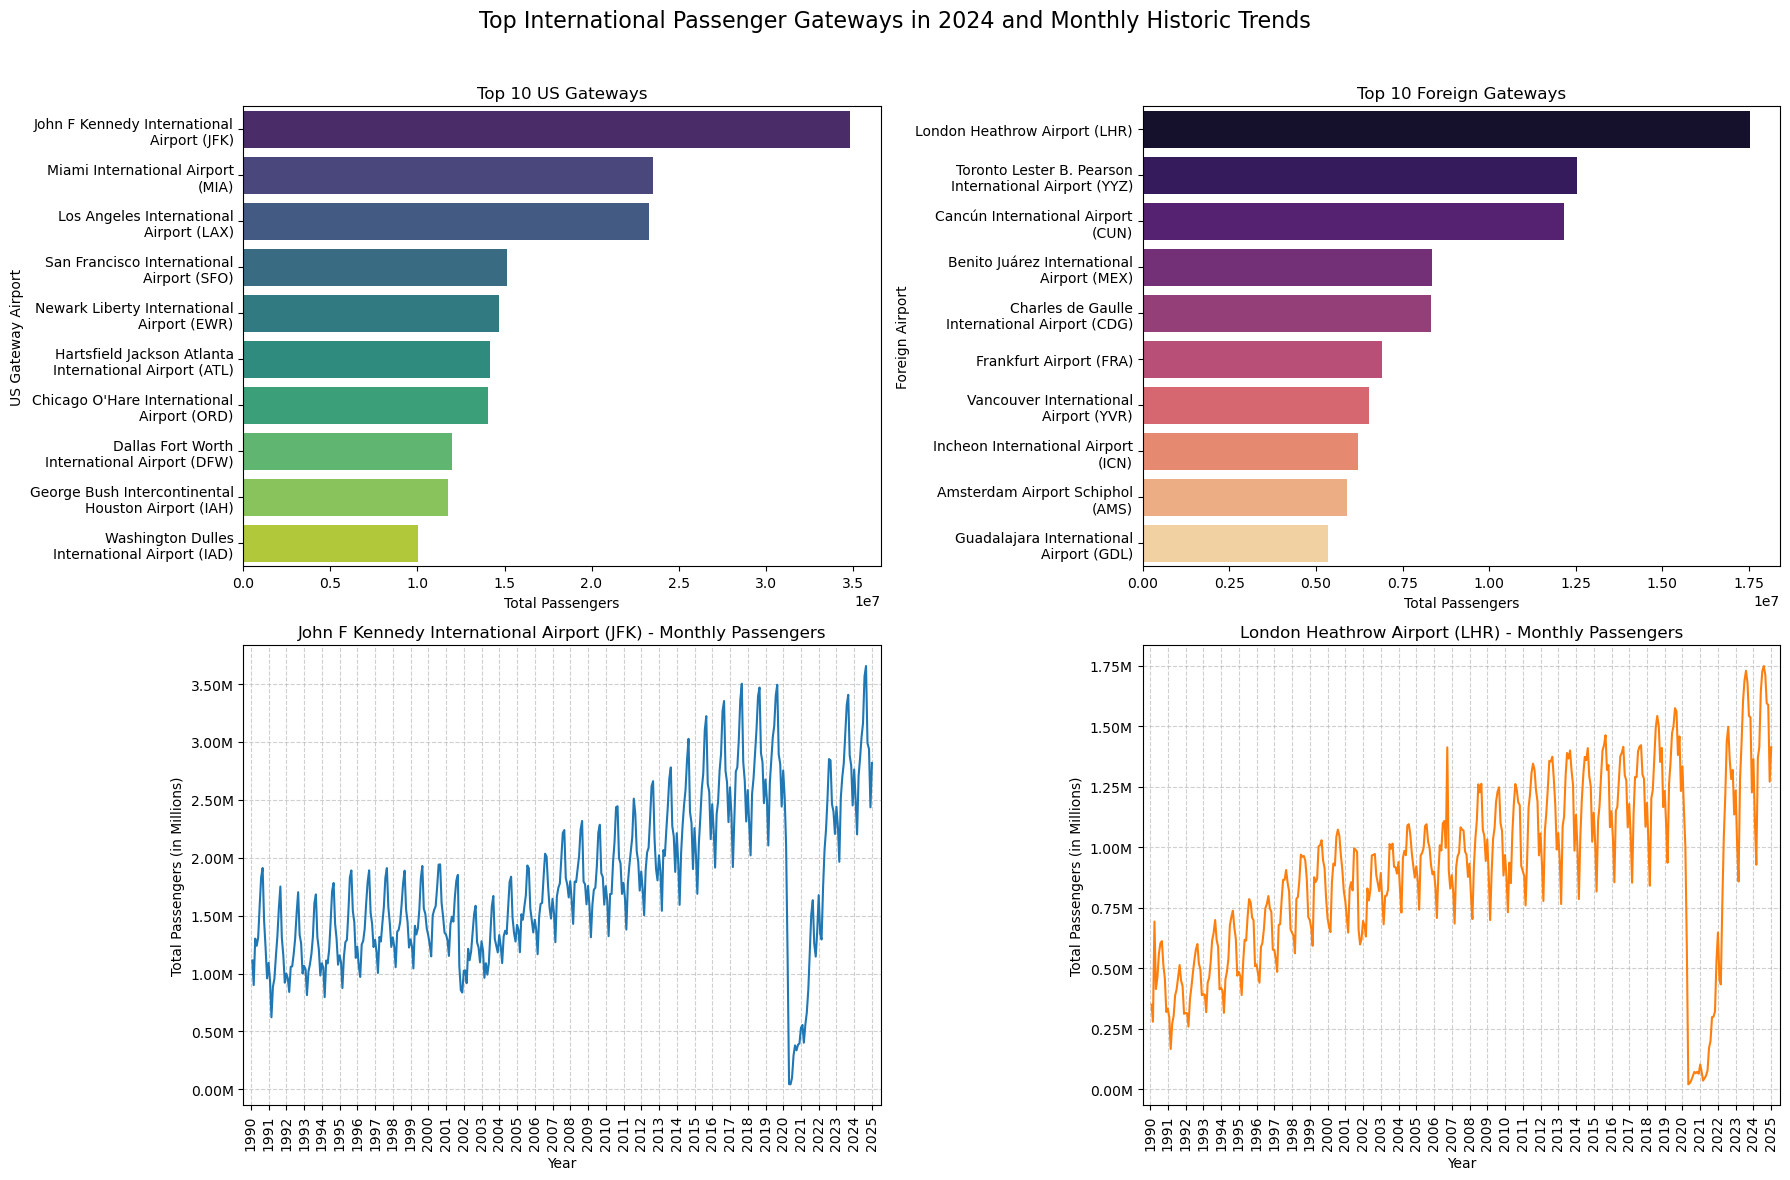

In [9]:
def plot_top_airports_barh(data, ax, palette, title, ylabel):
    """Creates a horizontal bar plot for top airports with wrapped labels."""
    
    # 1. Create your wrapped labels first
    wrapped_labels = [textwrap.fill(label, width=30) for label in data.index]
    
    # 2. Pass the pre-formatted labels directly to the 'y' parameter
    sns.barplot(
        x=data.values, 
        y=wrapped_labels,
        ax=ax, 
        palette=palette,
        hue=wrapped_labels,
        legend=False
    )
    ax.set_title(title)
    ax.set_xlabel('Total Passengers')
    ax.set_ylabel(ylabel)

def plot_airport_timeseries(df, airport_label_col, airport_name, ax, color):
    """Creates a time-series line plot for a single airport's monthly traffic."""
    df_month = df[df[airport_label_col] == airport_name].groupby(
        pd.Grouper(key='data_dte', freq='ME')
    )['total'].sum().reset_index()

    sns.lineplot(data=df_month, x='data_dte', y='total', ax=ax, color=color)
    
    # --- DYNAMIC X-AXIS LIMITS ---
    # Get the min and max dates from the data being plotted and set the limits.
    min_date = df_month['data_dte'].min()
    max_date = df_month['data_dte'].max()
    ax.set_xlim(min_date - pd.DateOffset(months=6), max_date + pd.DateOffset(months=6))
    
    # Format Y-axis to show millions
    formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.2f}M')
    ax.yaxis.set_major_formatter(formatter)
    
    # Set X-axis ticks to show the start of each year
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    ax.set_title(f'{airport_name} - Monthly Passengers')
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Passengers (in Millions)')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

# --- MAIN PLOTTING SCRIPT ---

# 1. Prepare the data
df_2024 = df[df.year == 2024]
top_usg = df_2024.groupby('usg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
top_fg = df_2024.groupby('fg_airport_label')['total'].sum().sort_values(ascending=False).head(10)

# 2. Create the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top International Passenger Gateways in 2024 and Monthly Historic Trends', fontsize=16)

# 3. Call the plotting functions
plot_top_airports_barh(top_usg, axes[0, 0], 'viridis', 'Top 10 US Gateways', 'US Gateway Airport')
plot_top_airports_barh(top_fg, axes[0, 1], 'magma', 'Top 10 Foreign Gateways', 'Foreign Airport')

busiest_us_name = top_usg.index[0]
plot_airport_timeseries(df, 'usg_airport_label', busiest_us_name, axes[1, 0], 'tab:blue')

busiest_fg_name = top_fg.index[0]
plot_airport_timeseries(df, 'fg_airport_label', busiest_fg_name, axes[1, 1], 'tab:orange')

# 4. Final adjustments and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(results_output_path / 'figures' / 'top_airports_and_trends.png', dpi=300)

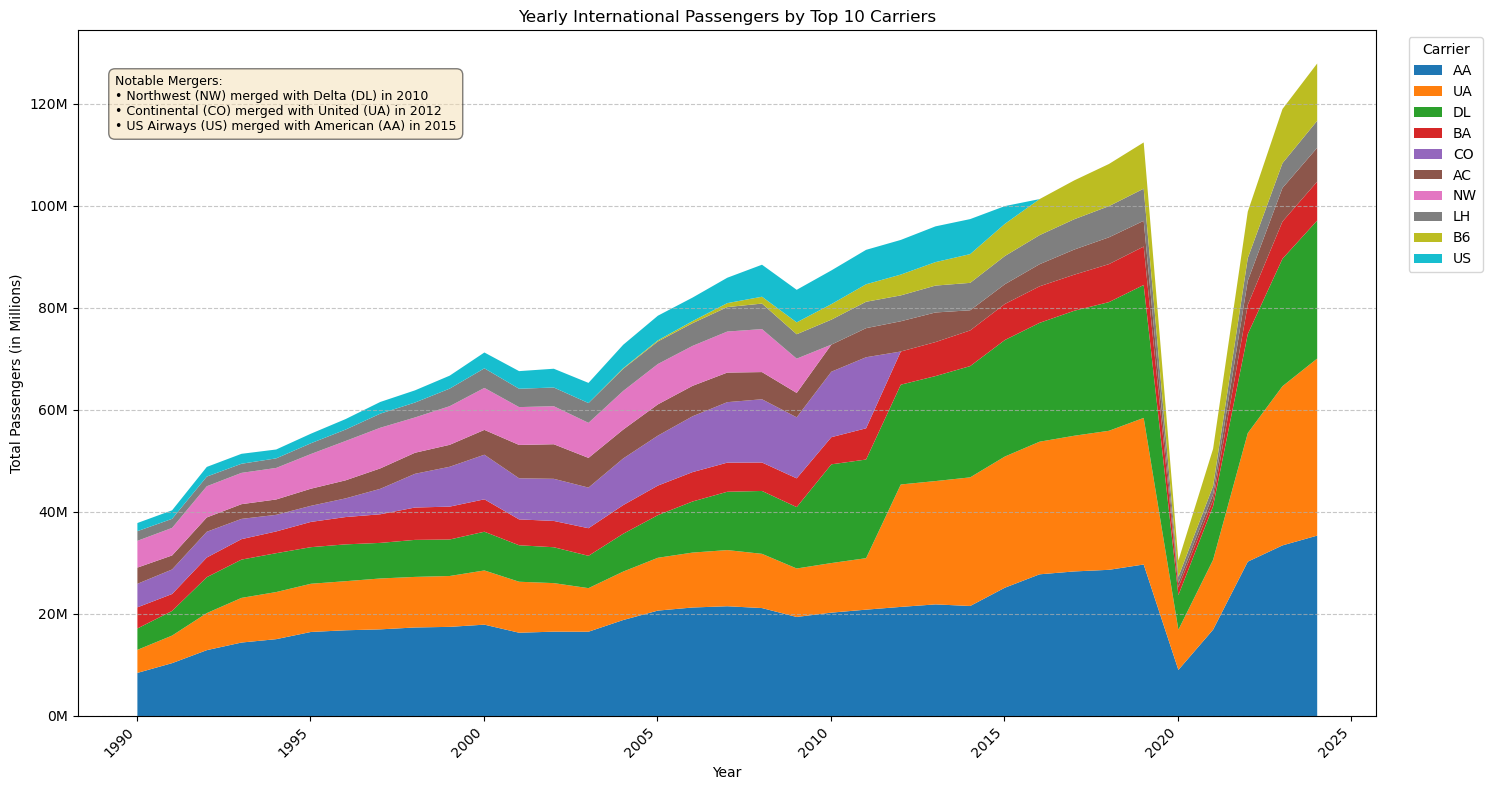

In [10]:
# --- Identify the Top 10 Carriers ---
# Find the top carriers based on total passengers over the entire period.
top_10_carriers = df.groupby('carrier')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# --- Prepare the Data for Plotting ---
# Filter the main DataFrame to include only the data for the top carriers.
df_top_carriers = df[df['carrier'].isin(top_10_carriers)].copy()

# Group by year and carrier to get the yearly data.
pax_by_carrier_year = df_top_carriers.groupby(['year', 'carrier'])['total'].sum().reset_index()

# Pivot the data to get carriers as columns. This is the key step for stacked bars.
df_pivoted = pax_by_carrier_year.pivot_table(
    index='year', 
    columns='carrier', 
    values='total', 
    fill_value=0
)

# Calculate the total passengers for each carrier over the entire period
carrier_totals = df_pivoted.sum().sort_values(ascending=False)

# Reorder the DataFrame columns based on this sorted list
df_pivoted_sorted = df_pivoted[carrier_totals.index]

# --- Create the Stacked Area Plot using the SORTED DataFrame ---
fig, ax = plt.subplots(figsize=(15, 8))

# Use the new df_pivoted_sorted DataFrame for plotting
df_pivoted_sorted.plot(
    kind='area', 
    stacked=True, 
    ax=ax,
    colormap='tab10',
    linewidth=0
)

# --- Format the Axes ---
# Format Y-axis to show millions
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.0f}M')
ax.yaxis.set_major_formatter(formatter)

# --- Add Labels and Title ---
ax.set_title('Yearly International Passengers by Top 10 Carriers')
ax.set_xlabel('Year')
ax.set_ylabel('Total Passengers (in Millions)')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Carrier', bbox_to_anchor=(1.02, 1), loc='upper left')

merger_text = (
    'Notable Mergers:\n'
    '• Northwest (NW) merged with Delta (DL) in 2010\n'
    '• Continental (CO) merged with United (UA) in 2012\n'
    '• US Airways (US) merged with American (AA) in 2015'
)

# Place the text in the upper-left corner of the figure
plt.figtext(
    0.08, 0.9,
    merger_text,
    ha='left',
    va='top',
    fontsize=9,
    bbox={'boxstyle': 'round,pad=0.5', 'facecolor': 'wheat', 'alpha': 0.5}
)

plt.tight_layout()
plt.savefig(results_output_path / 'figures' / 'top_10_carriers_stacked_area.png', dpi=300)

--- Generating dashboard for NA ---


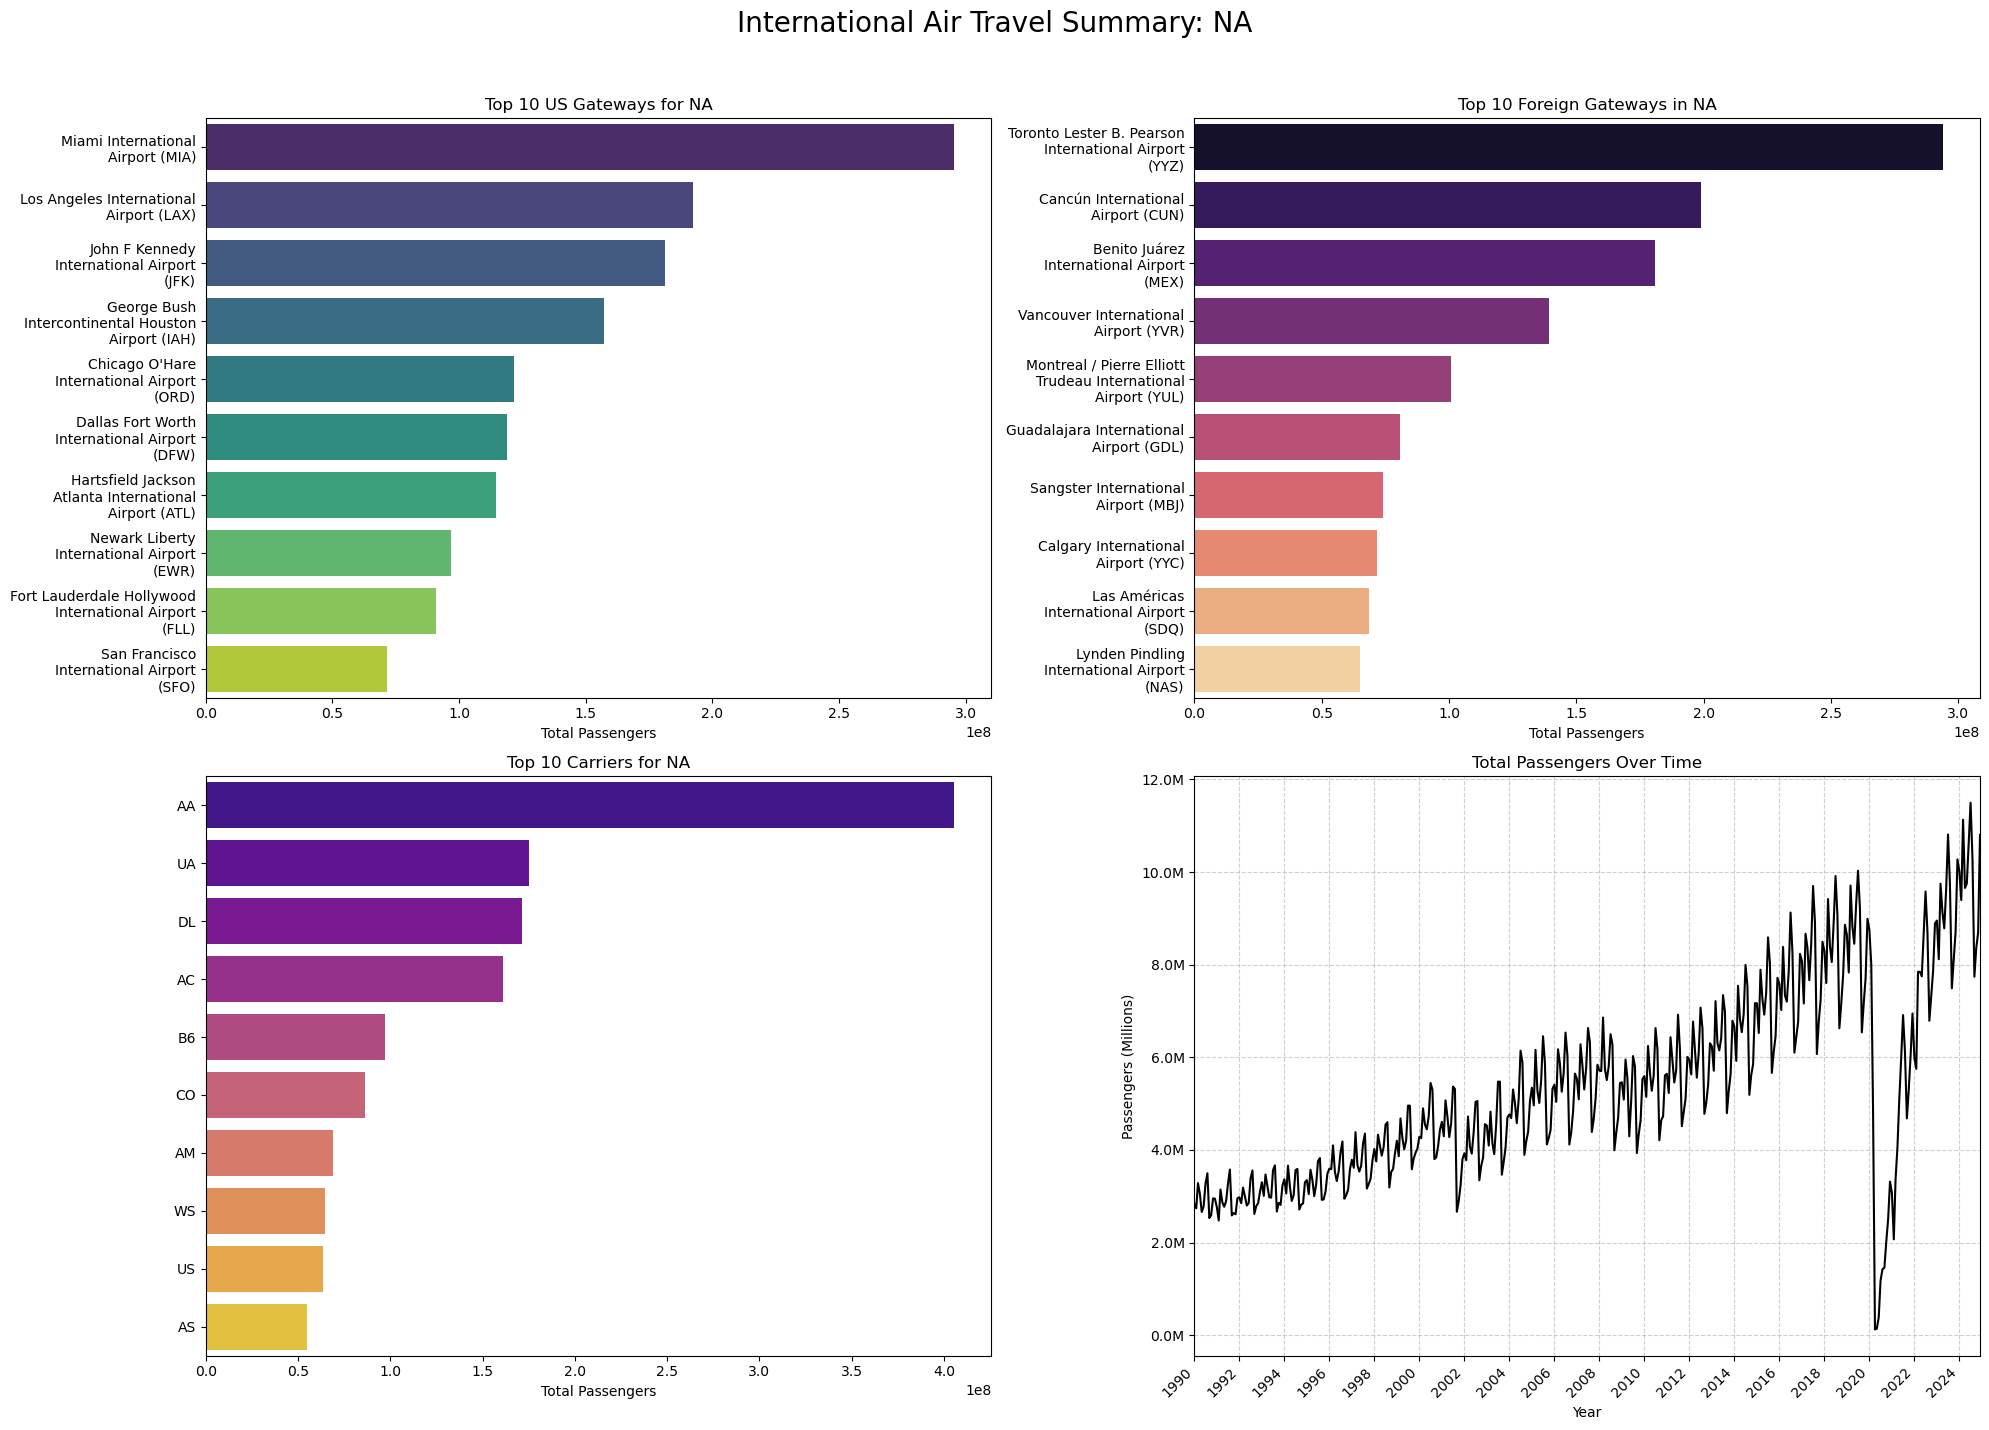

--- Generating dashboard for EU ---


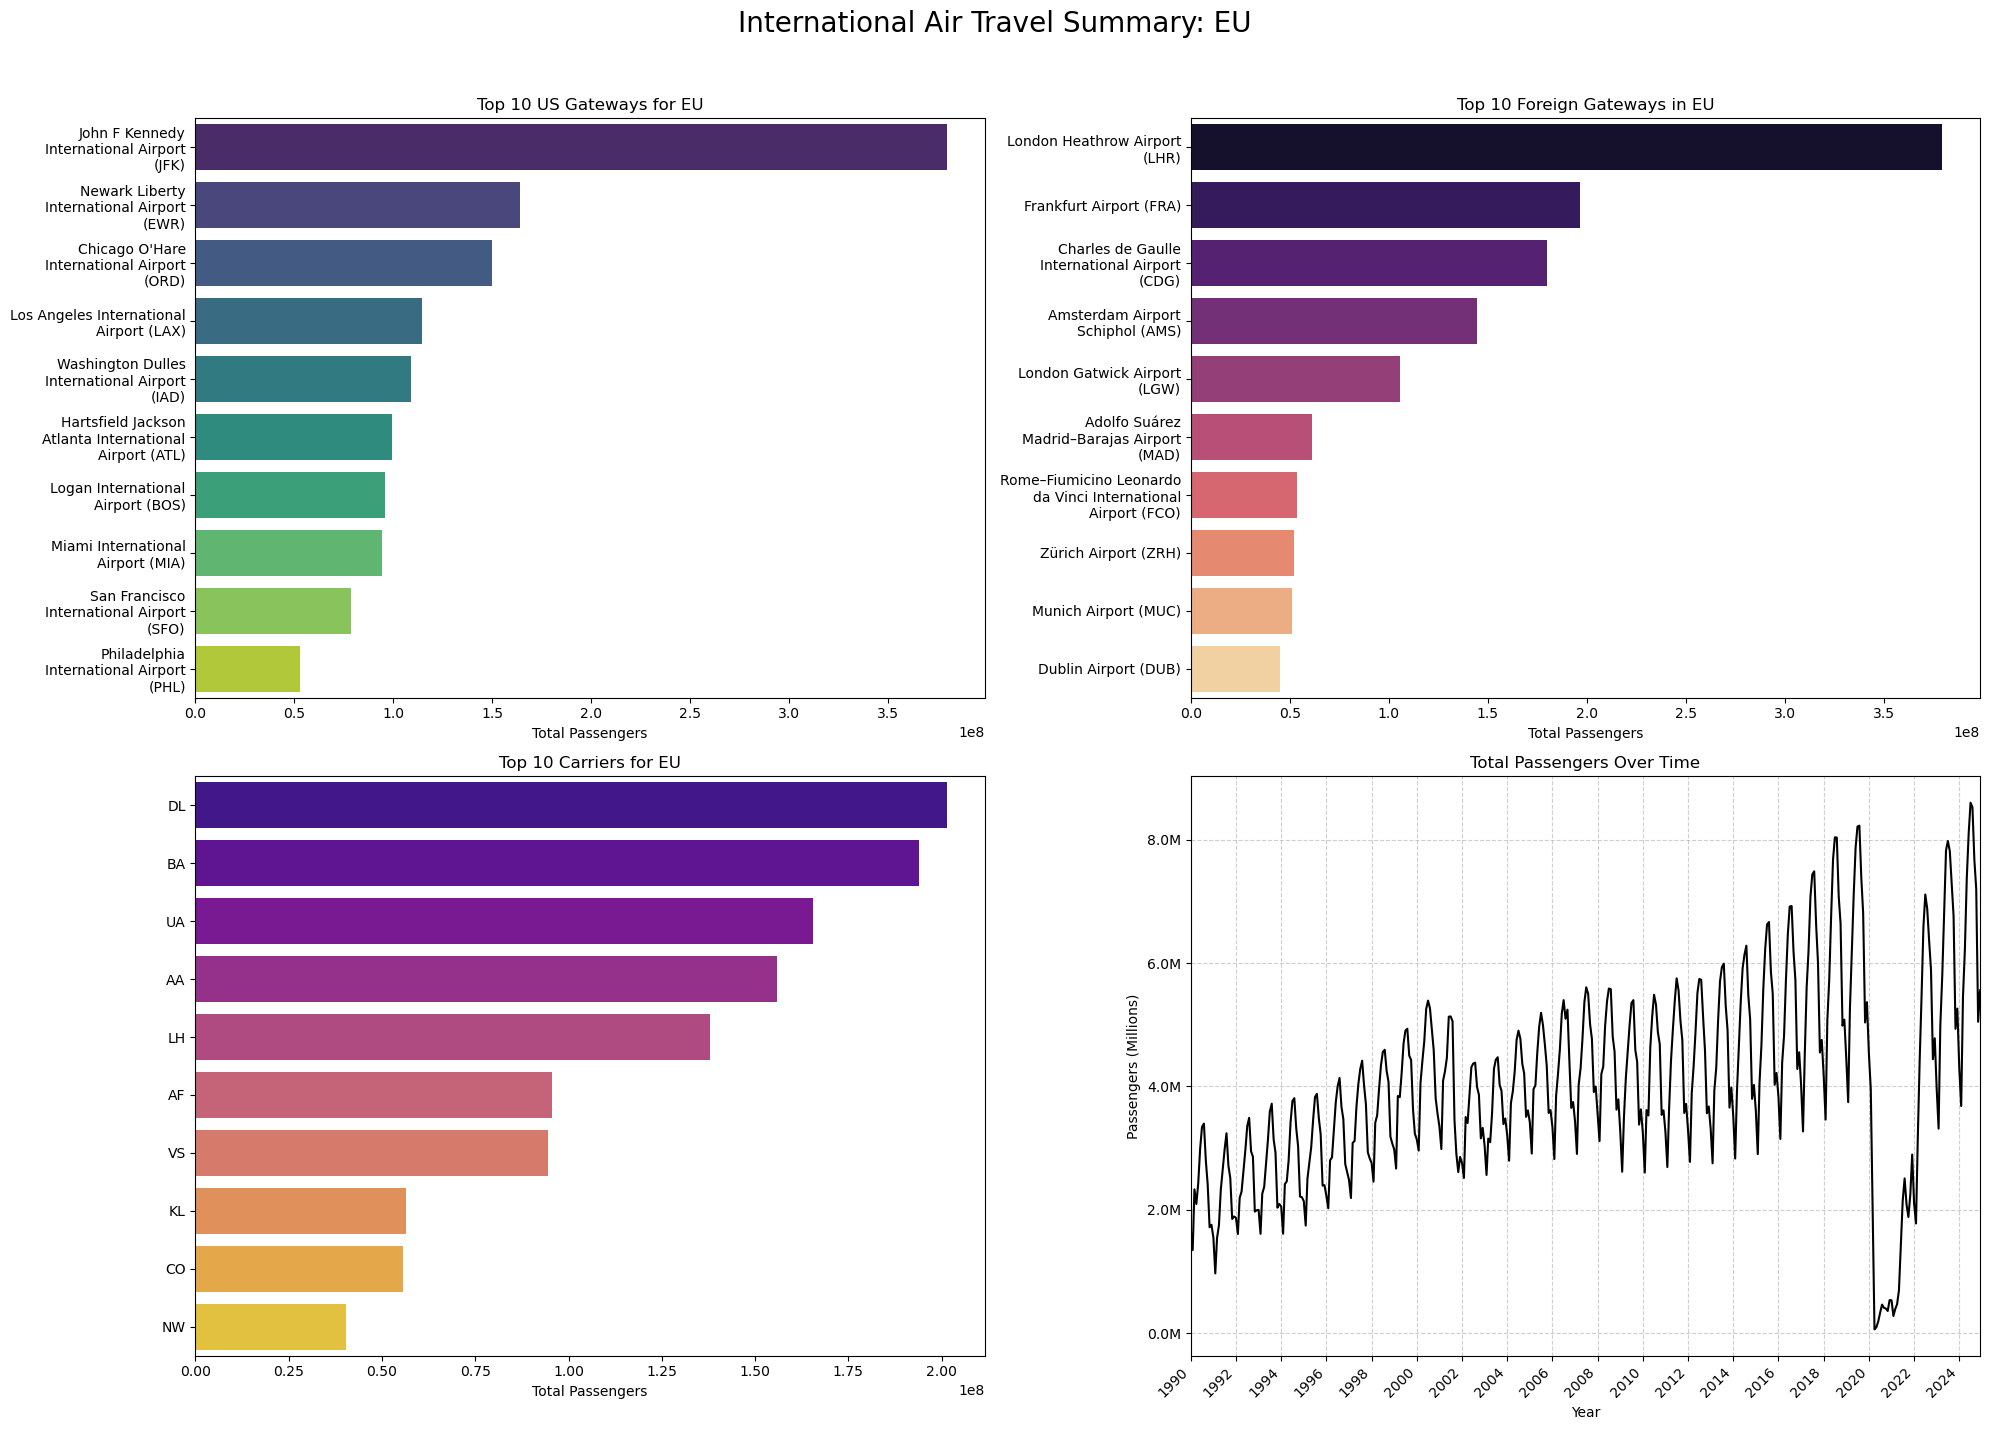

--- Generating dashboard for AS ---


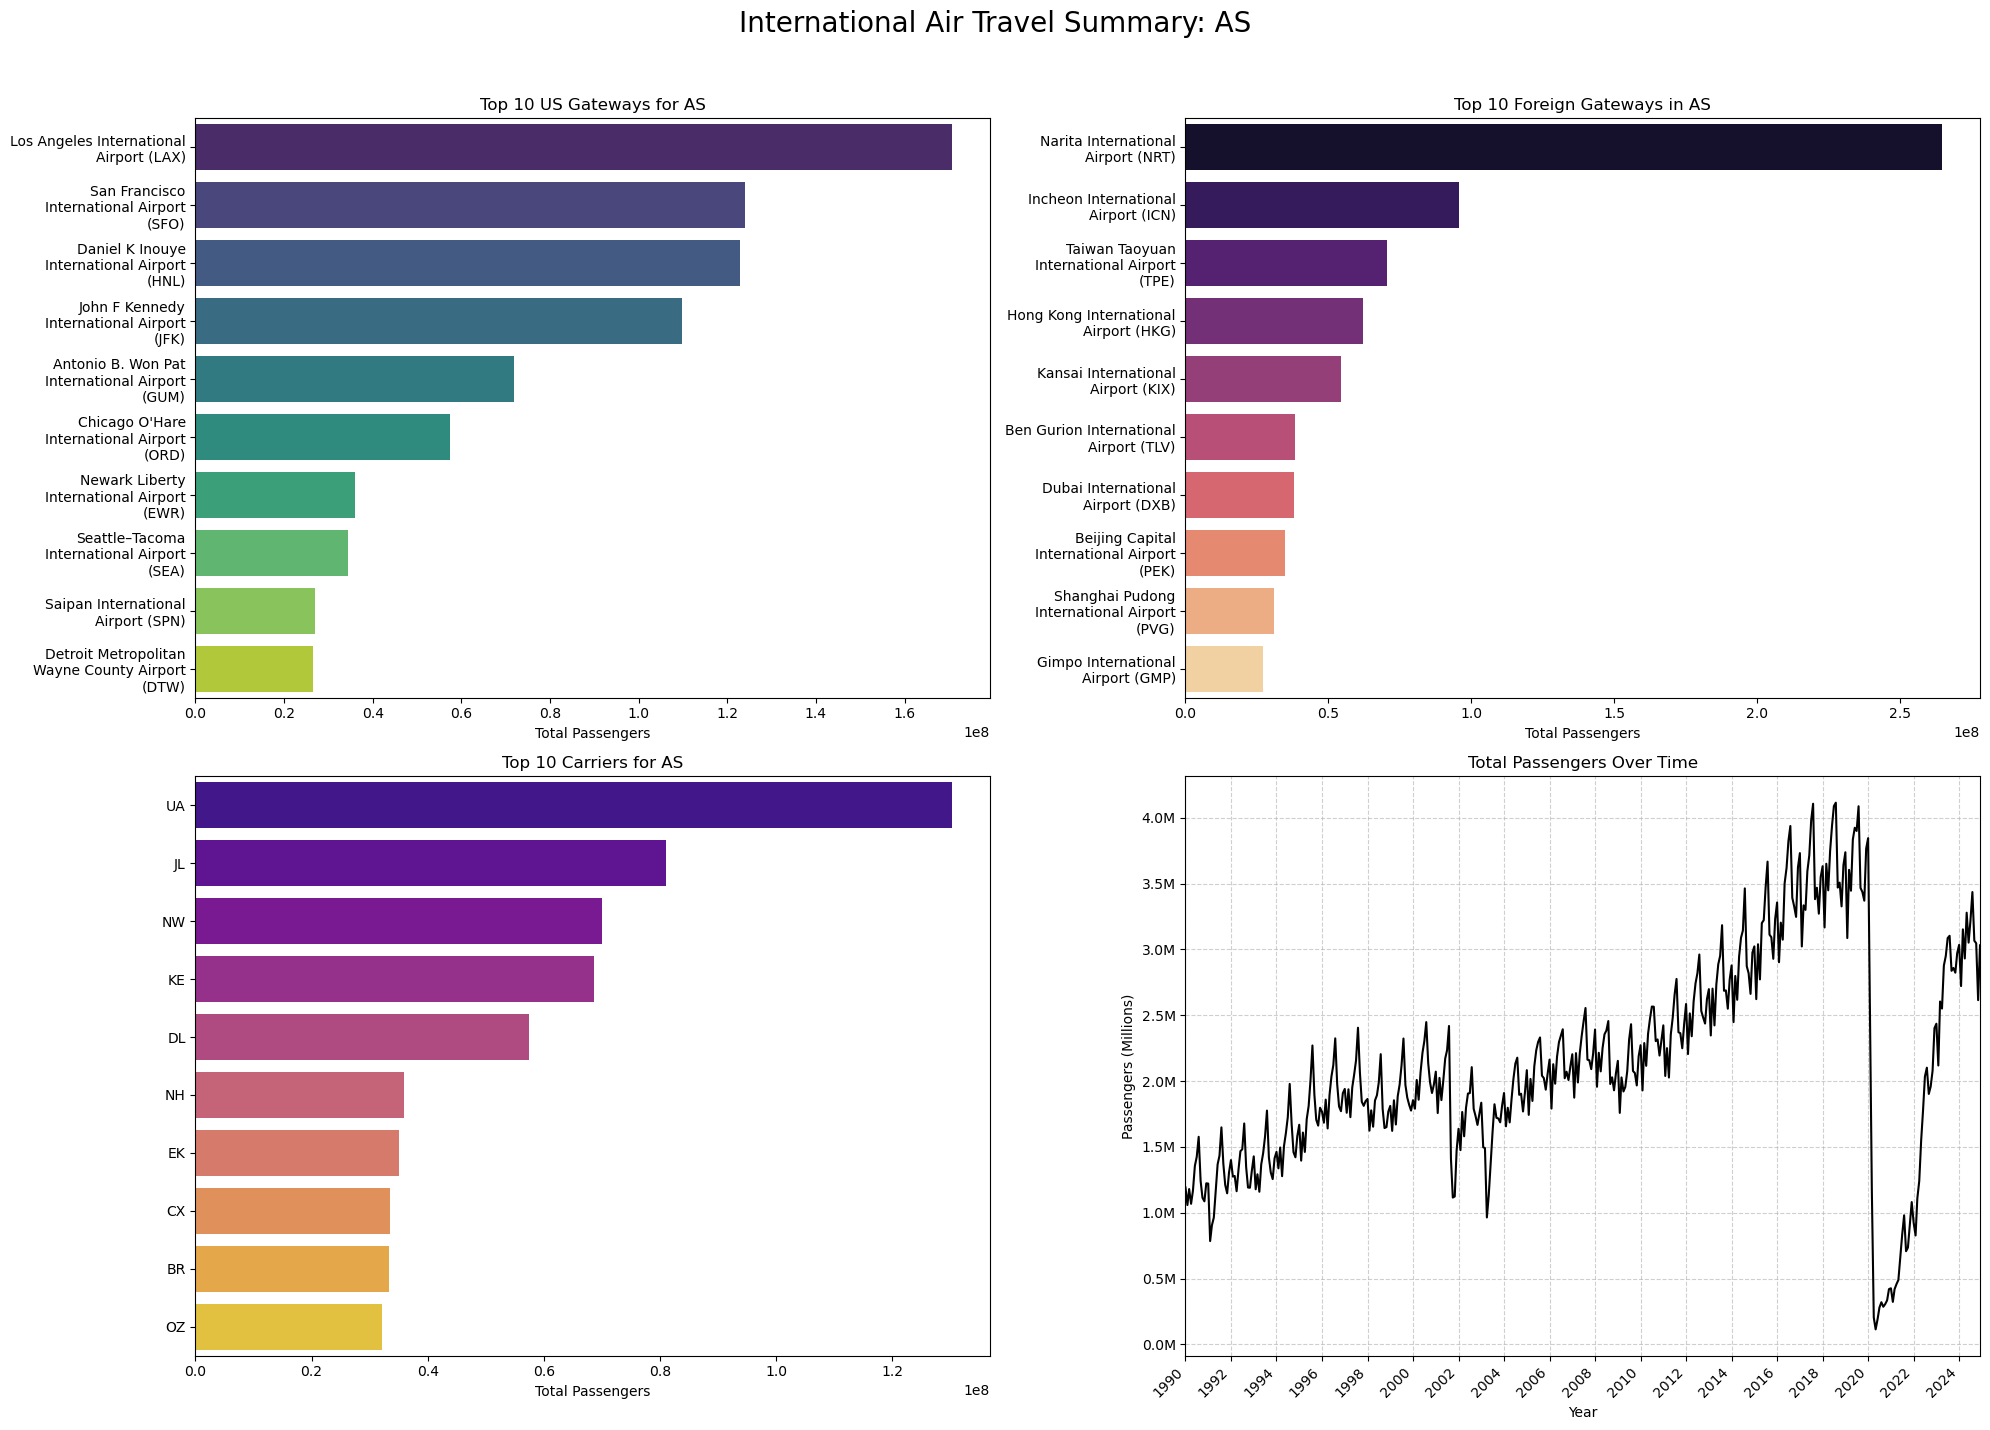

--- Generating dashboard for OC ---


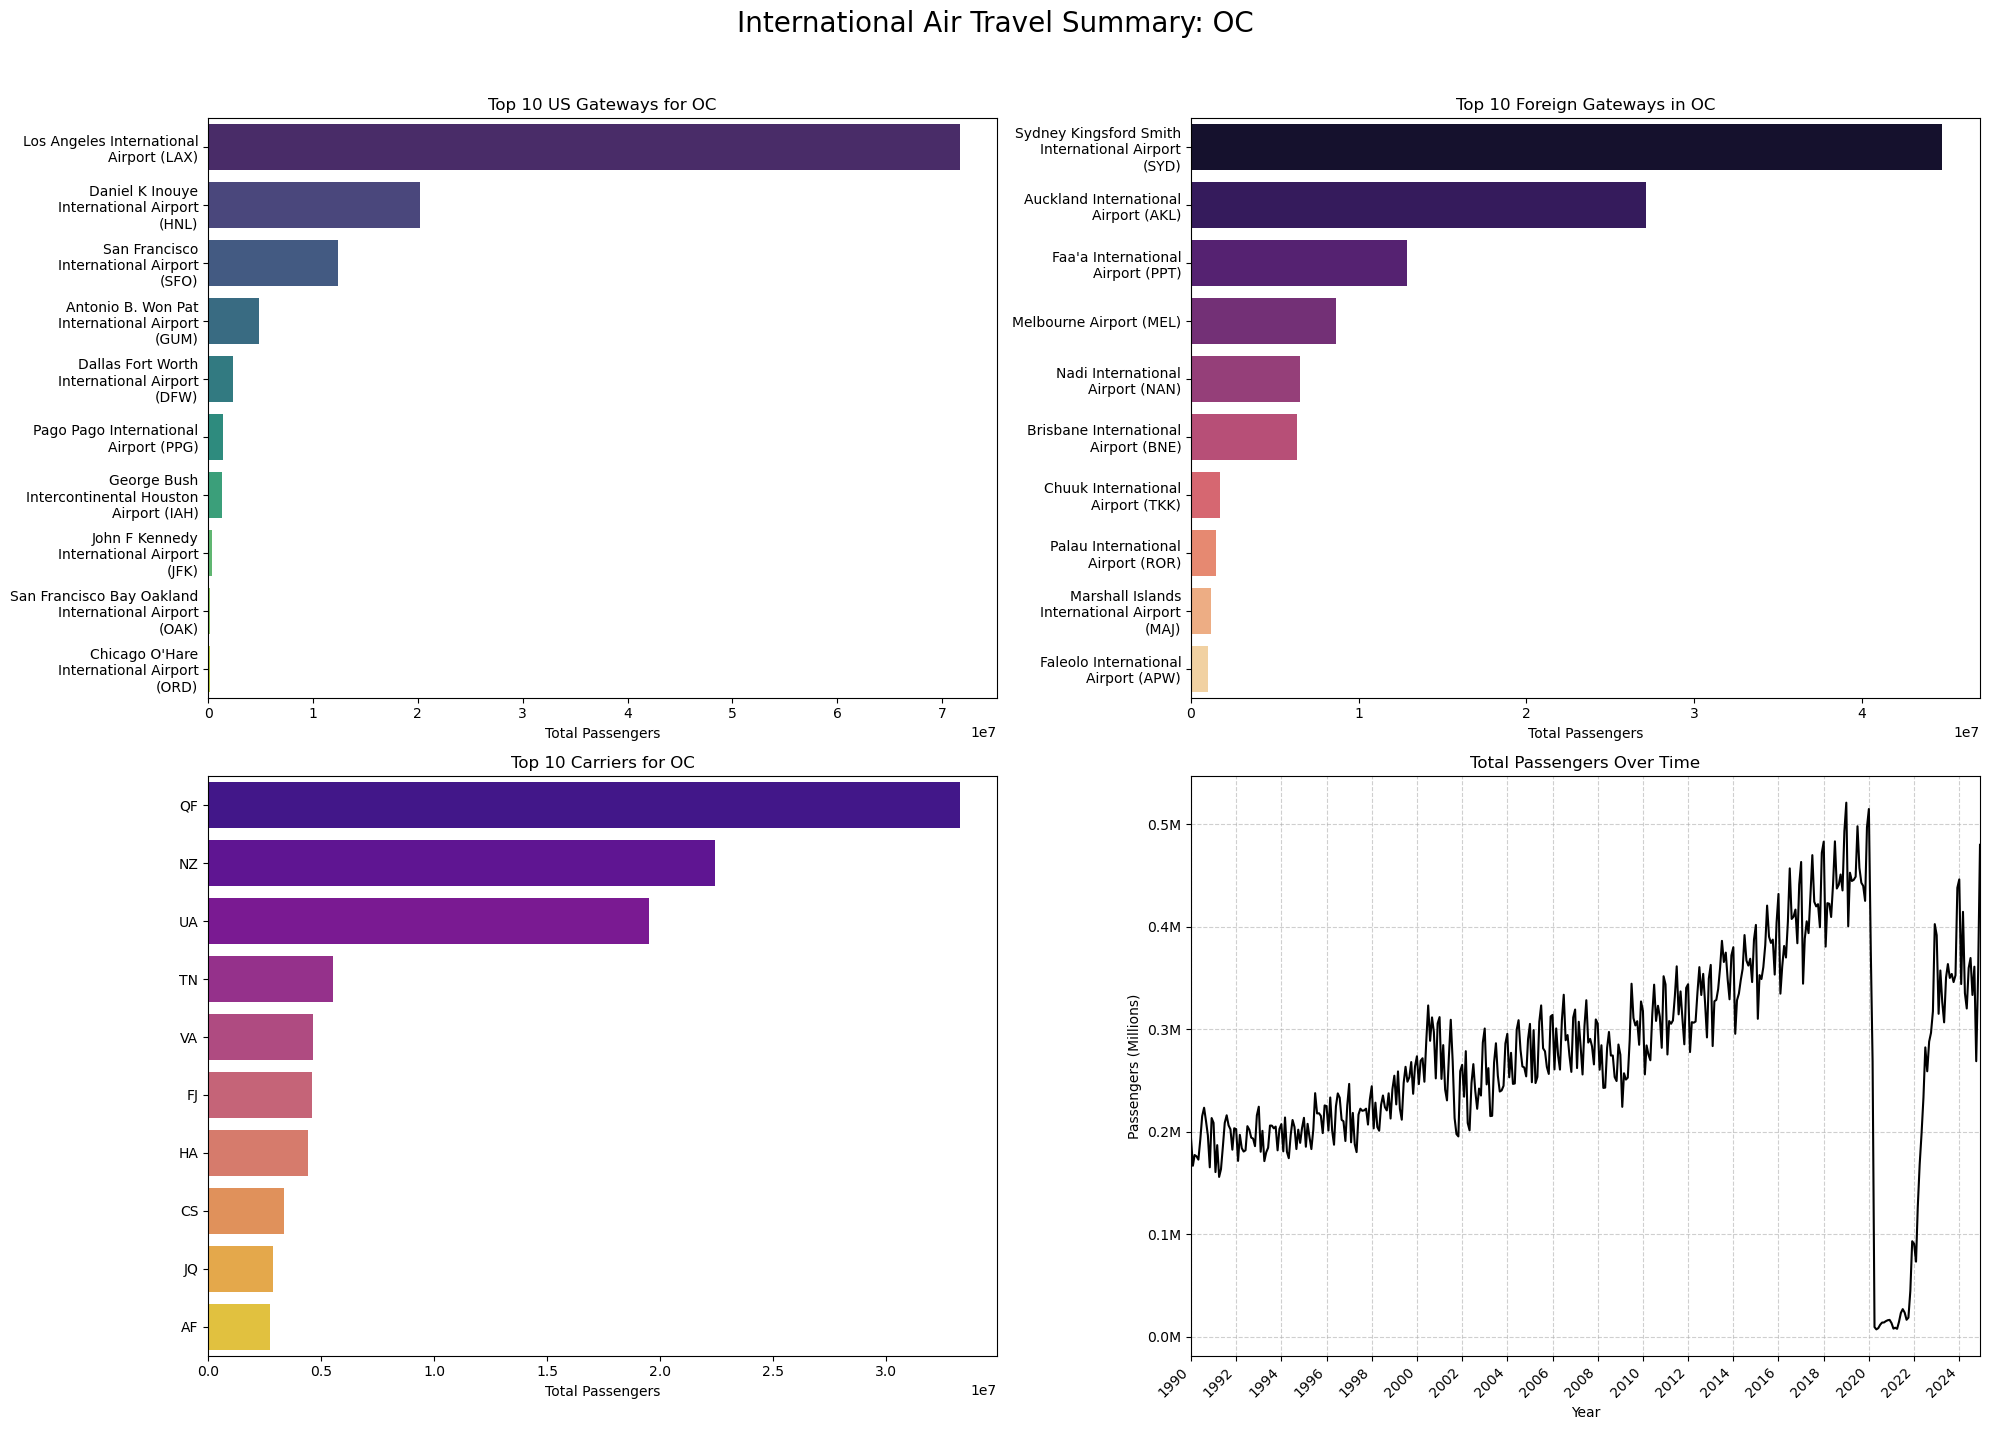

--- Generating dashboard for AF ---


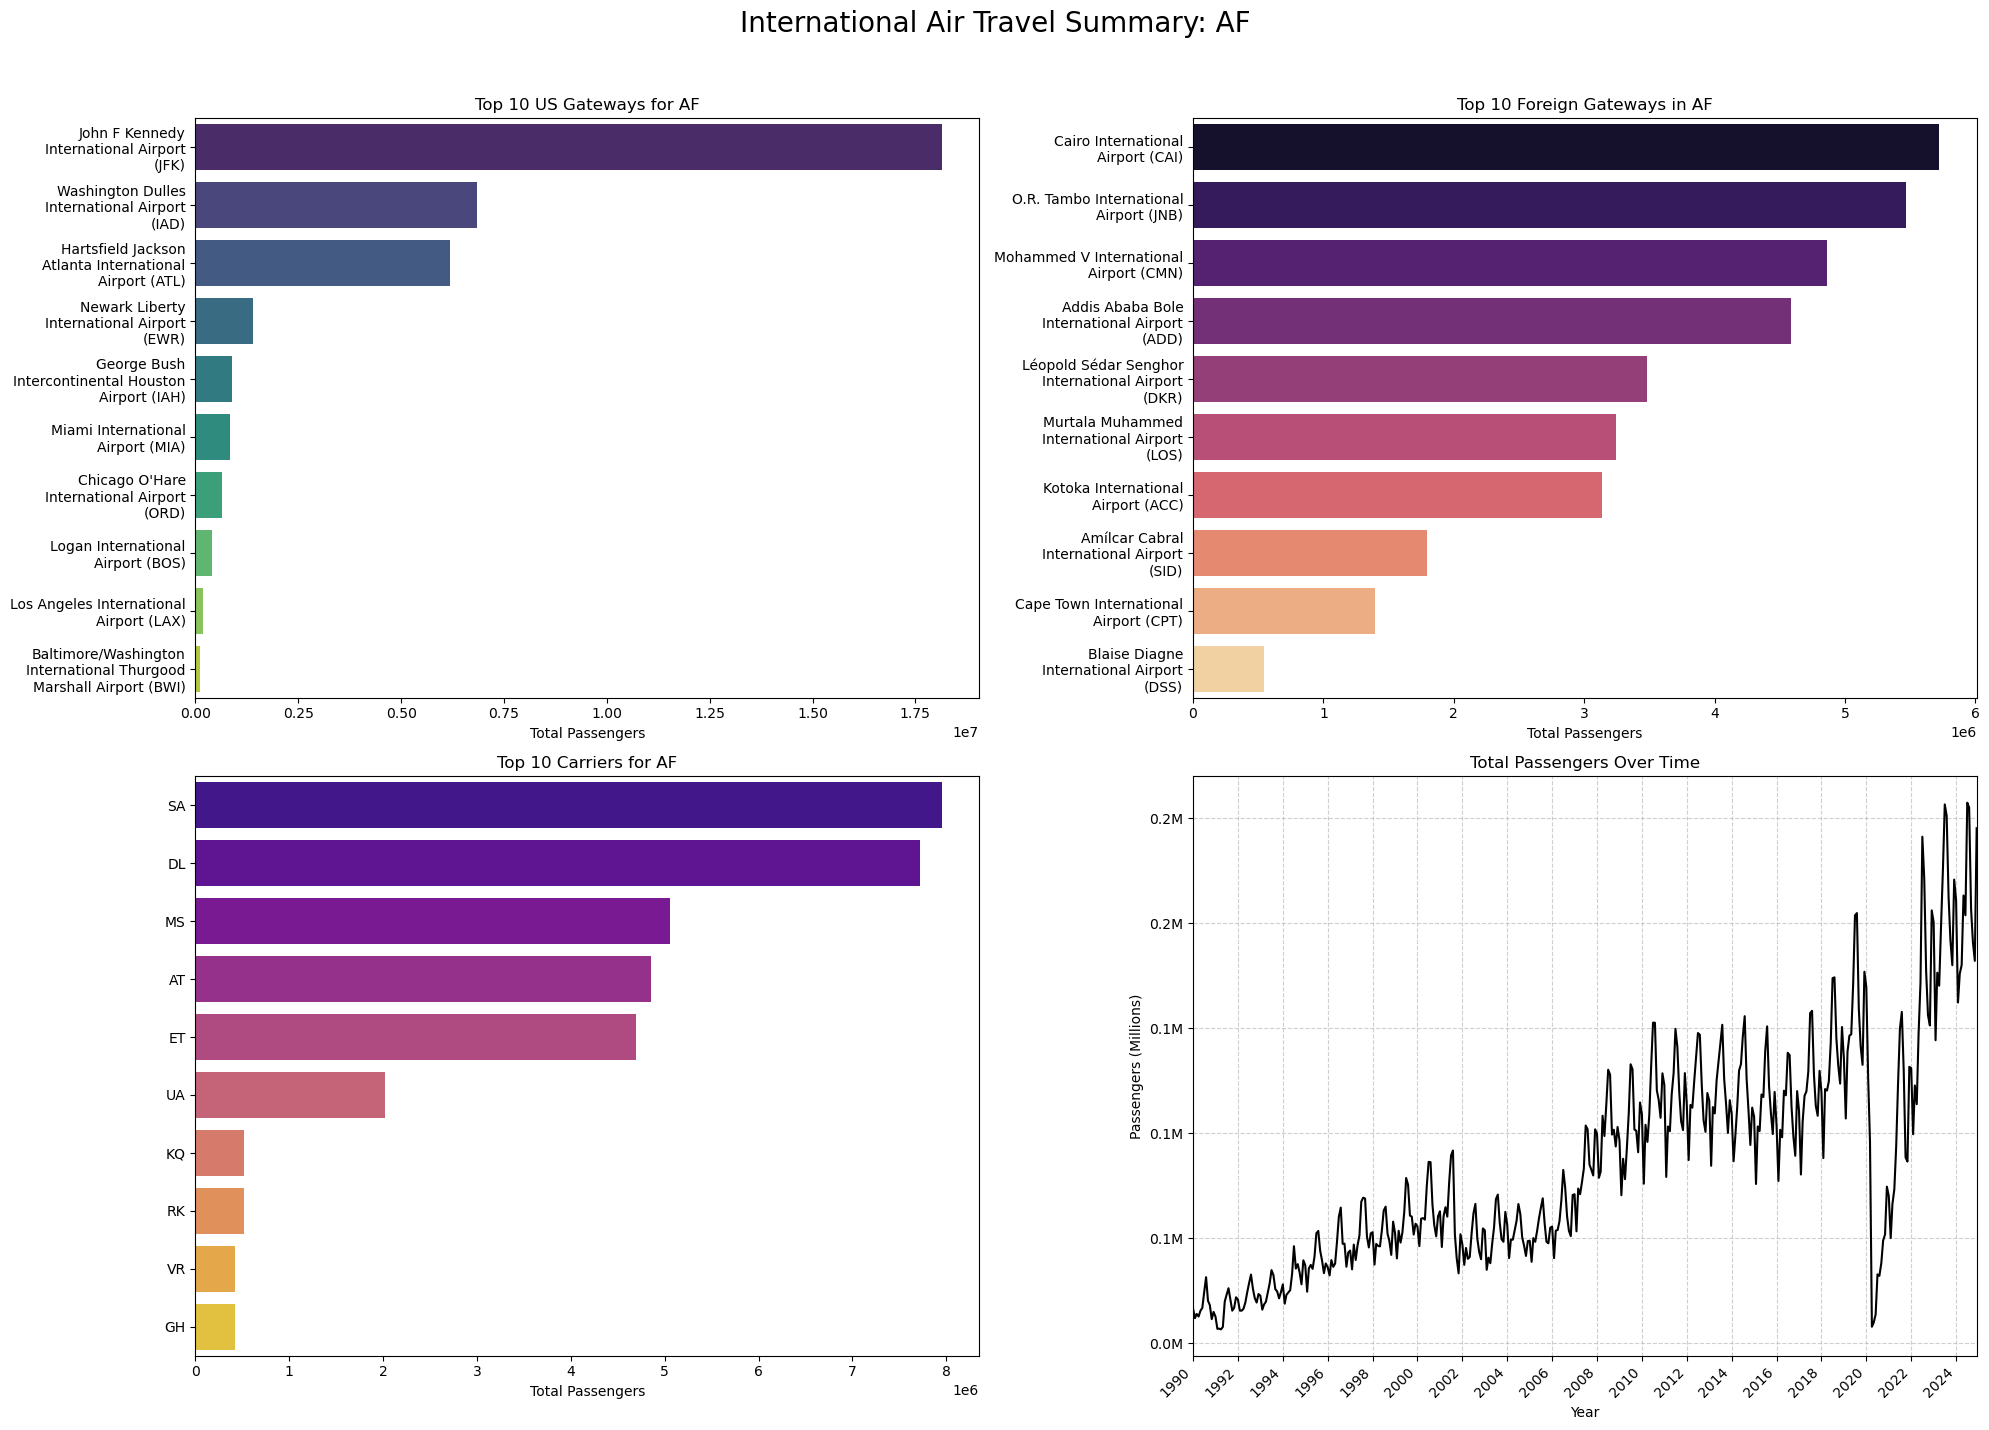

--- Generating dashboard for SA ---


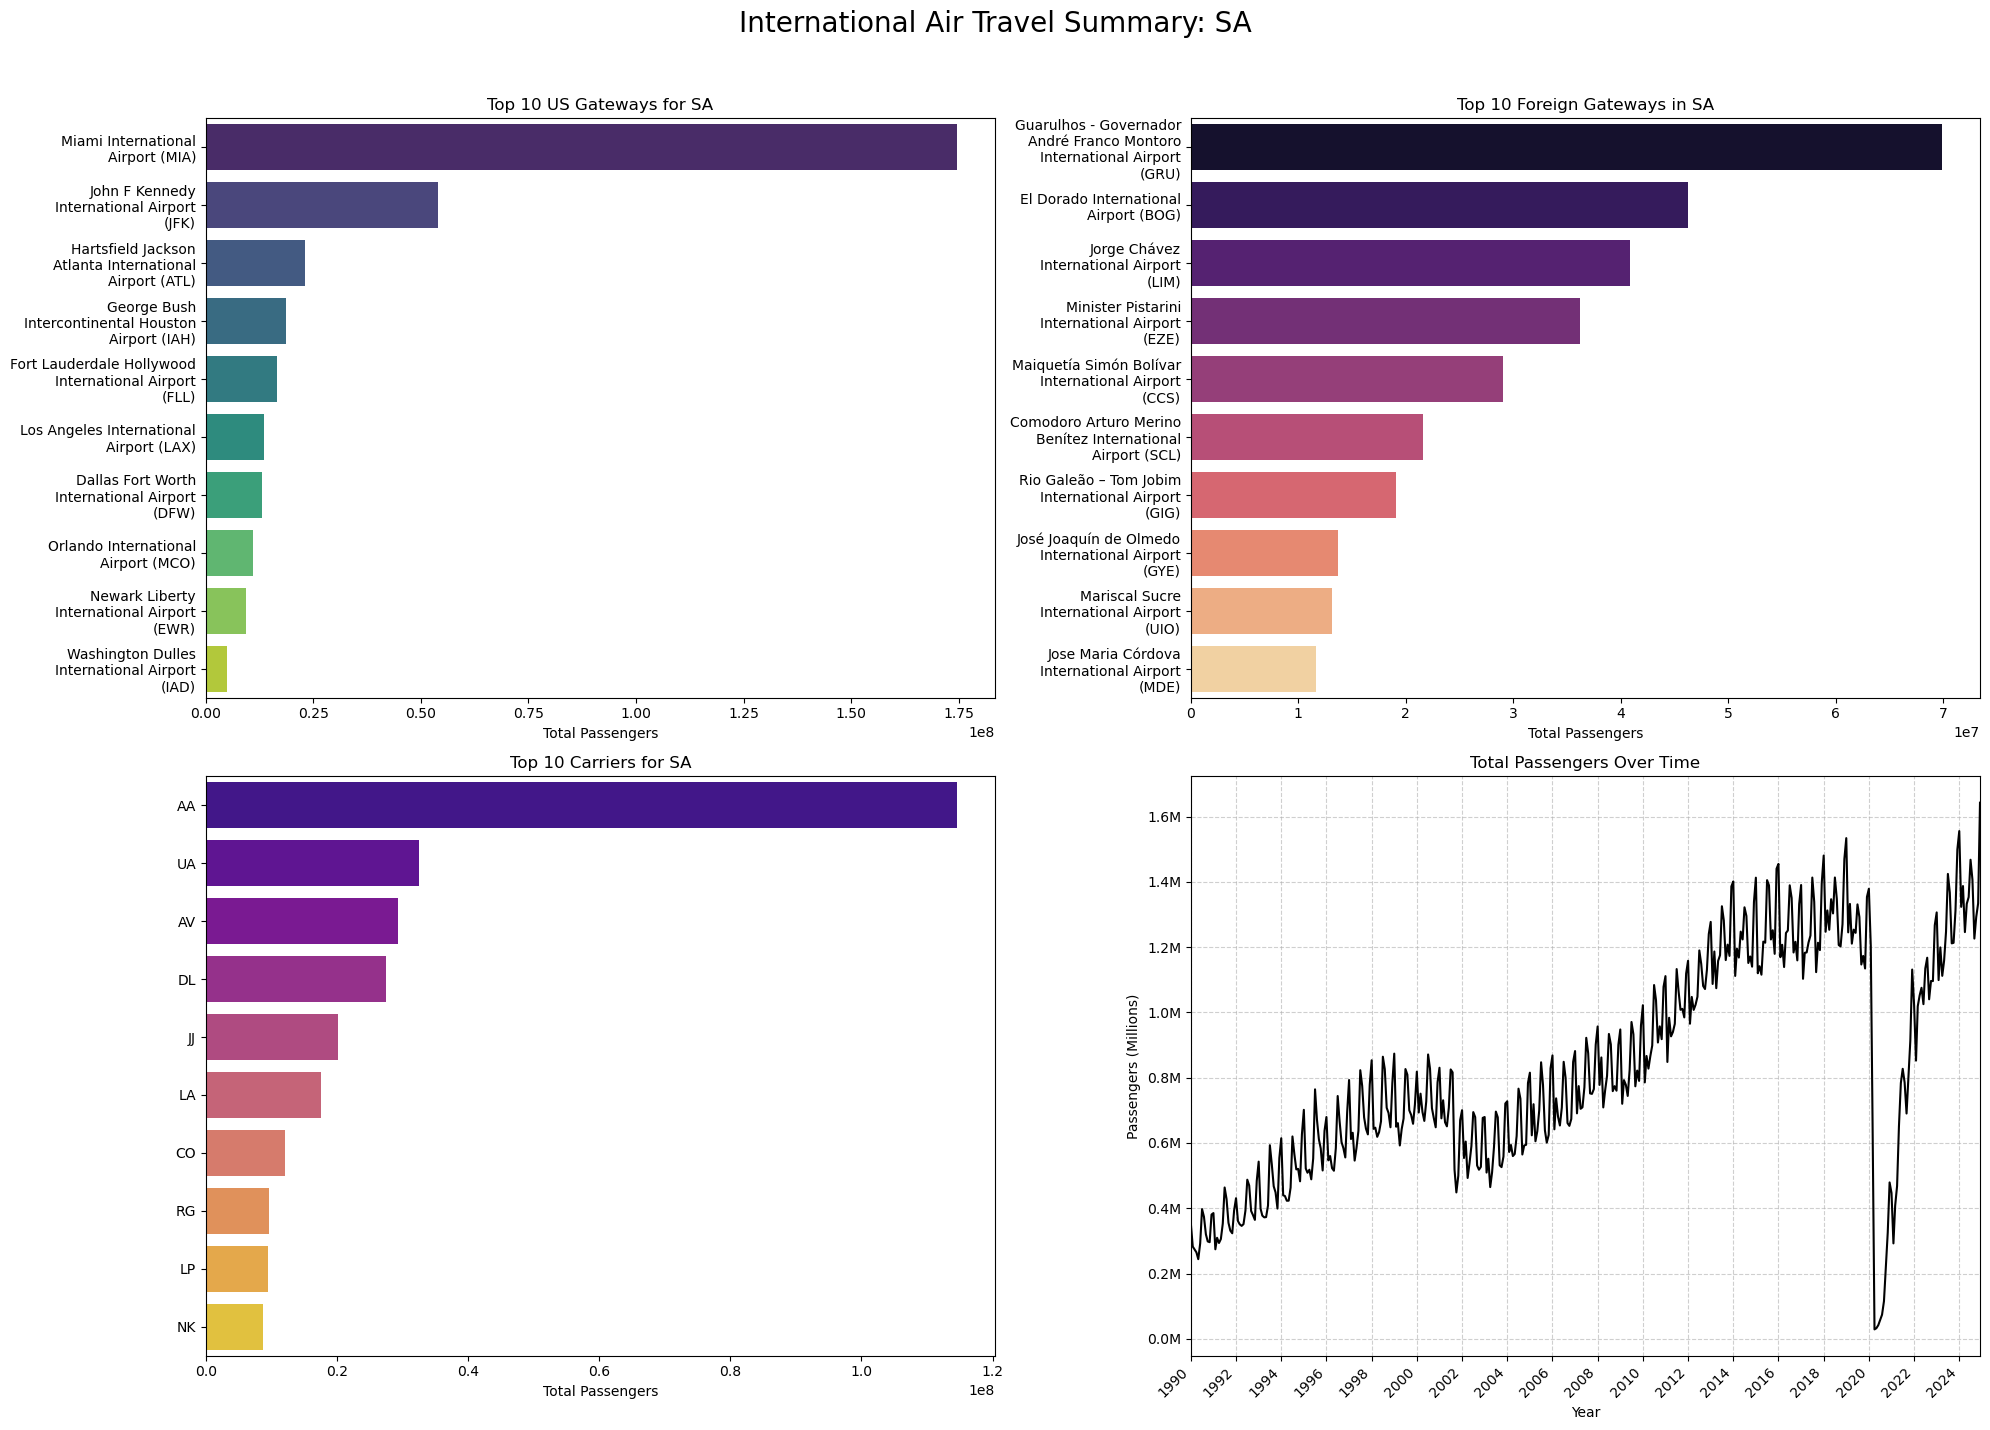


--- All continent dashboards have been generated. ---


In [11]:
def plot_top_horizontal_bar(data, ax, palette, title):
    """Creates a horizontal bar plot for top items with wrapped labels."""
    if data.empty:
        ax.text(0.5, 0.5, 'No Data Available', ha='center', va='center')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        return
        
    wrapped_labels = [textwrap.fill(label, width=25) for label in data.index]
    sns.barplot(x=data.values, y=wrapped_labels, ax=ax, palette=palette, hue=wrapped_labels, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Total Passengers')
    ax.set_ylabel(None)

def plot_total_passengers_timeseries(df_continent, ax, title):
    """Creates a time-series line plot for a continent's monthly passenger traffic."""
    pax_by_month = df_continent.groupby('data_dte')['total'].sum()
    sns.lineplot(data=pax_by_month, ax=ax, color='k')

    formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.1f}M')
    ax.yaxis.set_major_formatter(formatter)
    
    ax.set_xlim(df_continent['data_dte'].min(), df_continent['data_dte'].max())
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(2))
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Passengers (Millions)')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# --- MODIFIED DASHBOARD FUNCTION ---

def create_continent_dashboard(df_continent: pd.DataFrame, continent_name: str) -> plt.Figure:
    """
    Generates a 2x2 dashboard for a single continent and returns the figure object.
    """
    print(f"--- Generating dashboard for {continent_name} ---")
    
    # 1. Prepare data
    top_usg = df_continent.groupby('usg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
    top_fg = df_continent.groupby('fg_airport_label')['total'].sum().sort_values(ascending=False).head(10)
    top_carriers = df_continent.groupby('carrier')['total'].sum().sort_values(ascending=False).head(10)

    # 2. Create the plot grid
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(f'International Air Travel Summary: {continent_name}', fontsize=20)

    # 3. Populate the grid
    plot_top_horizontal_bar(top_usg, axes[0, 0], 'viridis', f'Top 10 US Gateways for {continent_name}')
    plot_top_horizontal_bar(top_fg, axes[0, 1], 'magma', f'Top 10 Foreign Gateways in {continent_name}')
    plot_top_horizontal_bar(top_carriers, axes[1, 0], 'plasma', f'Top 10 Carriers for {continent_name}')
    plot_total_passengers_timeseries(df_continent, axes[1, 1], 'Total Passengers Over Time')

    # 4. Adjust layout and return the figure object
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    return fig

# Get a list of unique continents to loop through
continents = df['fg_continent'].dropna().unique()

# --- MODIFIED LOOP ---
for continent in continents:
    df_for_continent = df[df['fg_continent'] == continent]
    
    # 1. Call the function to get the figure object
    fig = create_continent_dashboard(df_for_continent, continent)
    
    # 2. Define the output path and save the figure from outside the function
    plt.savefig(results_output_path / 'figures' / f'dashboard_{continent}.png', dpi=300)
    plt.show()
    
    # 3. Close the figure to free up memory
    plt.close(fig)

print("\n--- All continent dashboards have been generated. ---")

# World Bank Data
Reminder: 

    - US territories have different economic data and continent data than the rest of the US. Probably the same for foreign airports
    - Also, usg_iso_region and fg_iso_region includes the state/provience in the name, like US-GA or CA-QC

In [12]:
# usg_iso_region is like US-GA
df.loc[df.data_dte == '2024-01-01'][['usg_country_name', 'usg_continent', 'usg_iso_country', #'usg_iso_region',
                                     'usg_iso_country_alpha3', 'usg_gdp', 'usg_gdp_per_capita', 
                                     'usg_population', 'usg_tourism_arrivals', 'usg_trade_pct_gdp']].drop_duplicates()

usg_country_name usg_continent usg_iso_country  \
782613                      Guam            OC              GU   
782614             United States            NA              US   
782762       U.S. Virgin Islands            NA              VI   
782770               Puerto Rico            NA              PR   
783105             United States            OC              US   
783342            American Samoa            OC              AS   
788840  Northern Mariana Islands            OC              MP   

       usg_iso_country_alpha3       usg_gdp  usg_gdp_per_capita  \
782613                    GUM  6.910000e+09        41833.151713   
782614                    USA  2.918489e+13        85809.900385   
782762                    VIR  4.672000e+09        44320.909186   
782770                    PRI  1.258415e+11        39285.017459   
783105                    USA  2.918489e+13        85809.900385   
783342                    ASM  8.710000e+08        18017.458938   
788840                    MNP  1.096000e+09        23785.754590   

        usg_population  usg_tourism_arrivals  usg_trade_pct_gdp  
782613        167777.0          3.280000e+05          18.422576  
782614     340110988.0          4.503700e+07          18.586669  
782762        104377.0          8.612000e+06                NaN  
782770       3203295.0          3.882000e+06                NaN  
783105     340110988.0          4.503700e+07          18.586669  
783342         46765.0          9.000000e+02         117.680827  
788840         44278.0          4.870000e+05          50.547445

In [13]:
# Spain is both EU and AF, but WB data is the same
# fg_iso_region is like CA-QC
df.loc[df.data_dte == '2024-01-01'][['fg_country_name', 'fg_continent', 'fg_iso_country', #'fg_iso_region',
                                     'fg_iso_country_alpha3', 'fg_gdp', 'fg_gdp_per_capita',
                                     'fg_population', 'fg_tourism_arrivals', 'fg_trade_pct_gdp']].drop_duplicates().sort_values('fg_country_name')

fg_country_name fg_continent fg_iso_country  \
782734               Albania           EU             AL   
782787              Anguilla           NA             AI   
782887   Antigua and Barbuda           NA             AG   
782646             Argentina           SA             AR   
784752                 Aruba           NA             AW   
...                      ...          ...            ...   
783209  United Arab Emirates           AS             AE   
782766        United Kingdom           EU             GB   
782786               Uruguay           SA             UY   
793415            Uzbekistan           AS             UZ   
782622                  None         None           None   

       fg_iso_country_alpha3        fg_gdp  fg_gdp_per_capita  fg_population  \
782734                   ALB  2.717774e+10       10011.627986      2714617.0   
782787                   AIA           NaN                NaN            NaN   
782887                   ATG  2.224815e+09       23725.790373        93772.0   
782646                   ARG  6.332667e+11       13858.203980     45696159.0   
784752                   ABW  3.648573e+09       33984.790620       107624.0   
...                      ...           ...                ...            ...   
783209                   ARE  5.370788e+11       49377.564338     10876981.0   
782766                   GBR  3.643834e+12       52636.786594     69226000.0   
782786                   URY  8.096151e+10       23906.513303      3386588.0   
793415                   UZB  1.149653e+11        3161.700106     36361859.0   
782622                  None           NaN                NaN            NaN   

        fg_tourism_arrivals  fg_trade_pct_gdp  
782734            2658000.0         50.085115  
782787                  NaN               NaN  
782887             384500.0         37.711004  
782646            7399000.0         22.193335  
784752            1951000.0         42.701624  
...                     ...               ...  
783209            8084000.0        212.644018  
782766           11101000.0         36.467439  
782786            3480000.0         28.084950  
793415            6749000.0         47.824868  
782622                  NaN               NaN  

[114 rows x 9 columns]

### Looks like there is American military base data for USG airport

In [14]:
df[['usg_country_name', 'usg_iso_country', 'usg_continent']].drop_duplicates()

usg_country_name usg_iso_country usg_continent
0                              United States              US            NA
54                               Puerto Rico              PR            NA
65                  Northern Mariana Islands              MP            OC
73                                      Guam              GU            OC
272                      U.S. Virgin Islands              VI            NA
1938                                    None            None          None
4160                          American Samoa              AS            OC
4410                                   Palau              PW            OC
16651                              Indonesia              ID            AS
19276                                 Turkey              TR            AS
35118                                   Peru              PE            SA
50582   United States Minor Outlying Islands              UM            OC
71964                               Pakistan              PK            AS
94748                          United States              US            OC
167594                                  Iran              IR            AS
287568                              Colombia              CO            NA
387414                                Russia              RU            AS
505284                      Papua New Guinea              PG            OC
582478                                Brazil              BR            SA

 Also United States has OC as a continent for Hawaii

In [15]:
df.loc[df.usg_country_name == 'United States'][['usg_country_name', 'usg_iso_country','usg_iso_region', 'usg_continent']].drop_duplicates()

usg_country_name usg_iso_country usg_iso_region usg_continent
0        United States              US          US-FL            NA
4        United States              US          US-NJ            NA
9        United States              US          US-NV            NA
14       United States              US          US-ME            NA
16       United States              US          US-PA            NA
20       United States              US          US-GA            NA
21       United States              US          US-IL            NA
31       United States              US          US-HI            NA
32       United States              US          US-MI            NA
39       United States              US          US-MA            NA
44       United States              US          US-CA            NA
47       United States              US          US-MO            NA
51       United States              US          US-NY            NA
58       United States              US          US-KY            NA
72       United States              US          US-TX            NA
75       United States              US          US-VA            NA
77       United States              US          US-CT            NA
80       United States              US          US-IN            NA
90       United States              US          US-TN            NA
94       United States              US          US-UT            NA
98       United States              US          US-LA            NA
109      United States              US          US-CO            NA
132      United States              US          US-MN            NA
137      United States              US          US-NC            NA
139      United States              US          US-MD            NA
164      United States              US          US-AZ            NA
176      United States              US          US-WI            NA
187      United States              US          US-SC            NA
234      United States              US          US-OH            NA
380      United States              US          US-WV            NA
601      United States              US          US-AK            NA
643      United States              US          US-MT            NA
664      United States              US          US-AL            NA
712      United States              US          US-WA            NA
954      United States              US          US-OR            NA
968      United States              US          US-IA            NA
1206     United States              US          US-ND            NA
1250     United States              US          US-RI            NA
1610     United States              US          US-ID            NA
1677     United States              US          US-NE            NA
1988     United States              US          US-NM            NA
2038     United States              US          US-NH            NA
2296     United States              US          US-AR            NA
4224     United States              US          US-VT            NA
4280     United States              US          US-DC            NA
4606     United States              US          US-SD            NA
4776     United States              US          US-OK            NA
20624    United States              US          US-WY            NA
20992    United States              US          US-MS            NA
35024    United States              US          US-KS            NA
50716    United States              US          US-DE            NA
94748    United States              US          US-HI            OC

--- usg_population ---


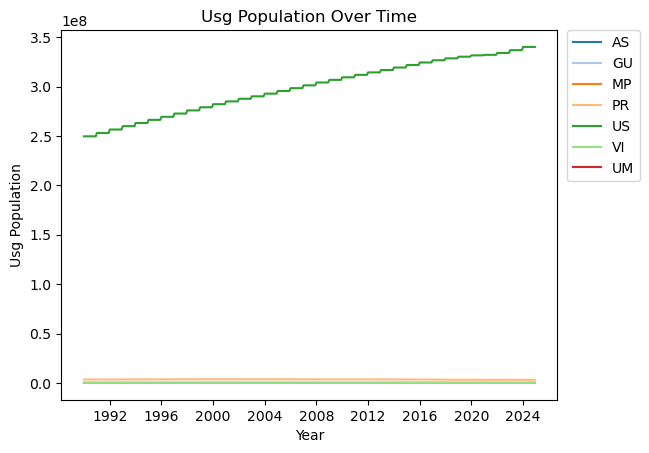

--- usg_gdp ---


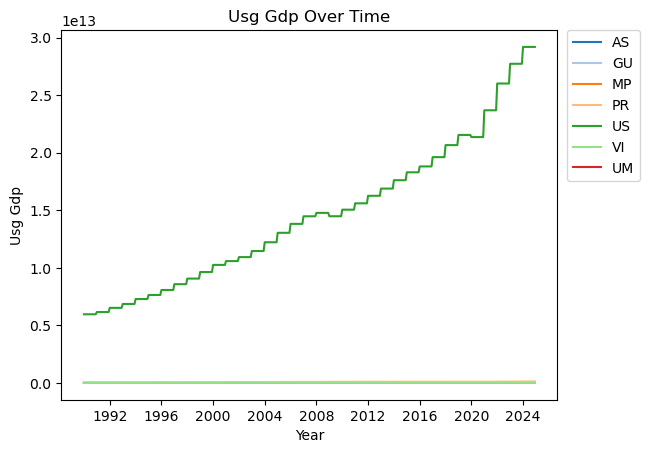

--- usg_gdp_per_capita ---


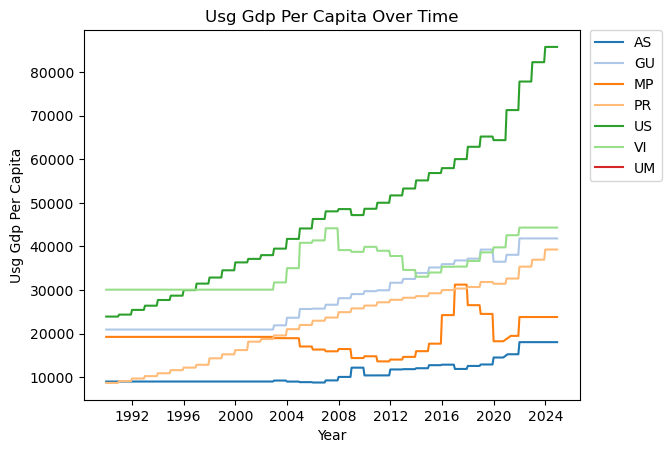

--- usg_trade_pct_gdp ---


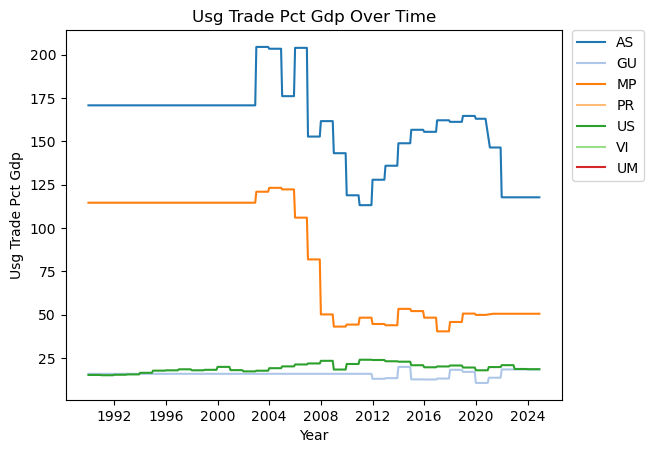

--- usg_tourism_arrivals ---


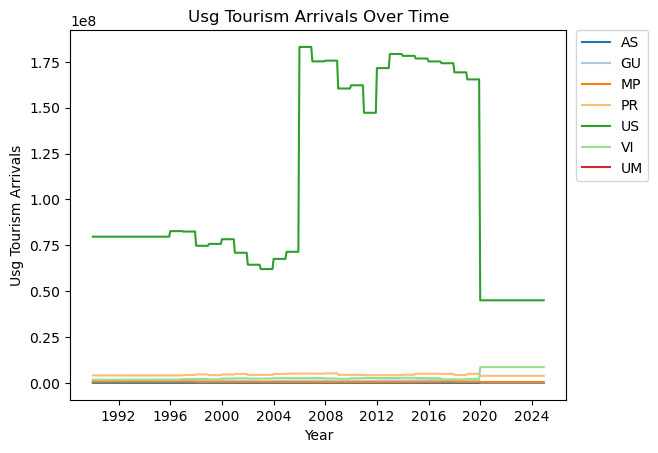

--- usg_remittances_paid ---


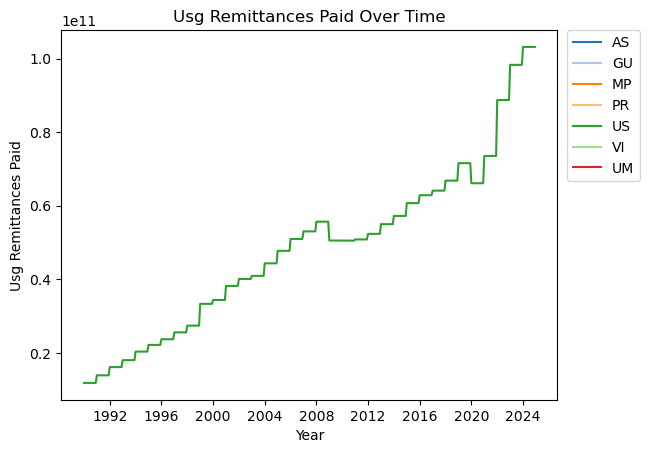

--- usg_remittances_received ---


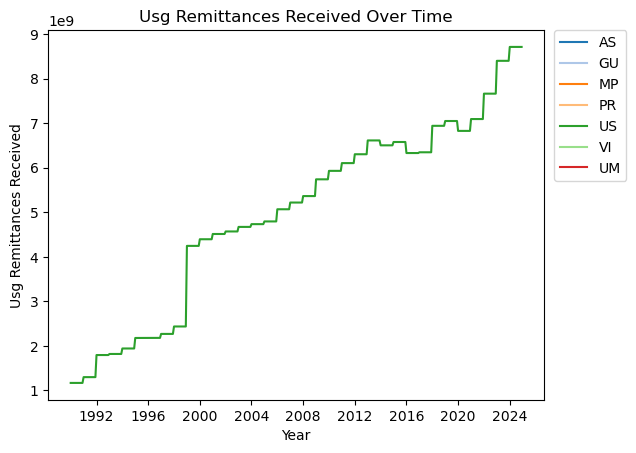

--- usg_inflation_cp ---


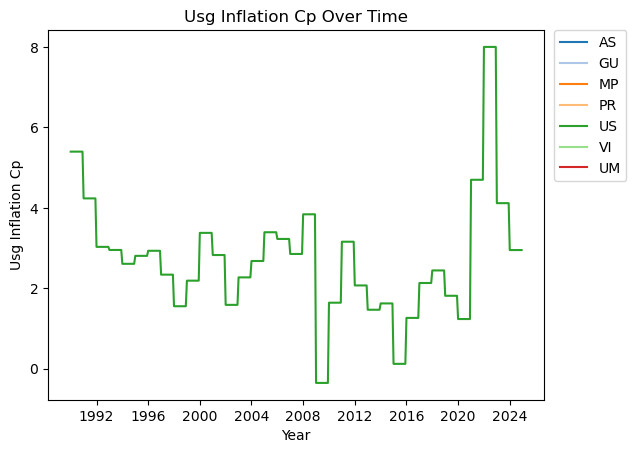

--- usg_air_departures ---


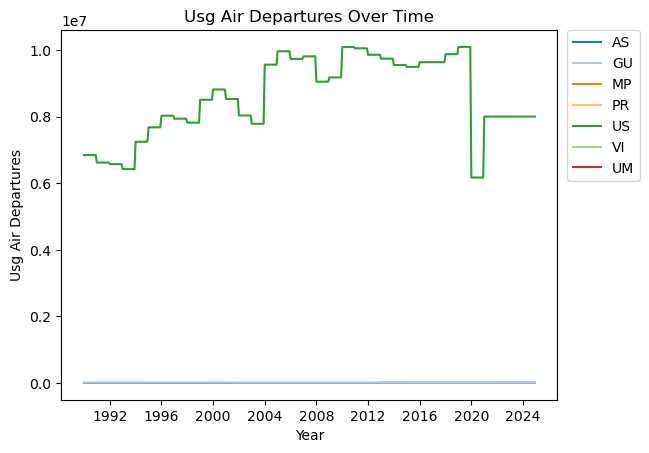

--- usg_USD_exchange_rate ---


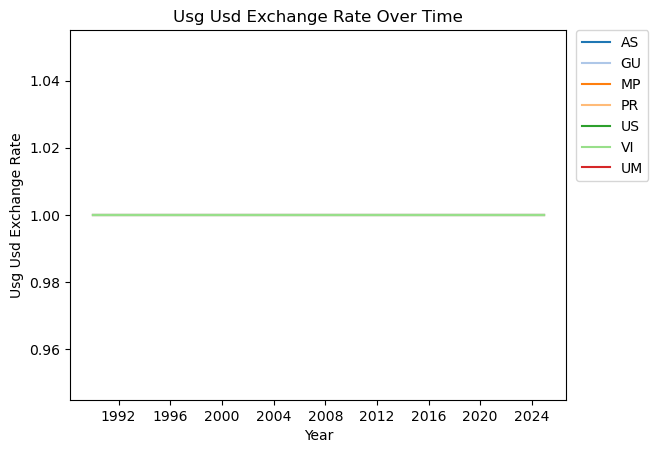

--- jet_fuel_price ---


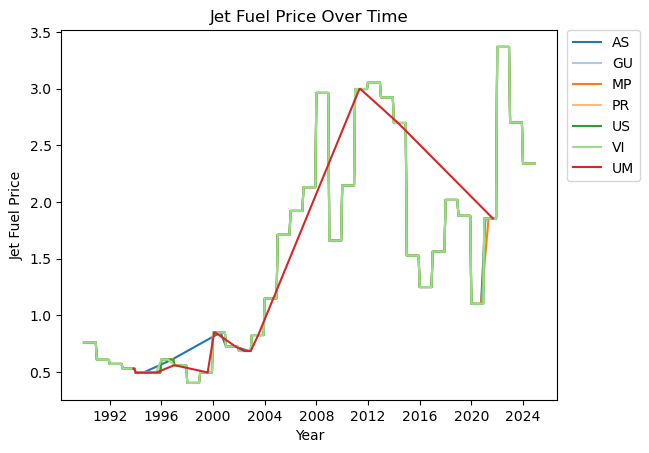

In [16]:
for wb_col in ['usg_population', 'usg_gdp', 'usg_gdp_per_capita', 'usg_trade_pct_gdp', 'usg_tourism_arrivals', 
               'usg_remittances_paid', 'usg_remittances_received', 'usg_inflation_cp', 'usg_air_departures', 
               'usg_USD_exchange_rate', 'jet_fuel_price']:
    print(f"--- {wb_col} ---")
    plot_df = df.loc[df.usg_iso_country.isin(['US', 'PR', 'MP', 'GU', 'VI', 'AS', 'UM'])] \
        [['data_dte', wb_col, 'usg_iso_country']] \
        .drop_duplicates().groupby(['data_dte', 'usg_iso_country']).mean().reset_index()
    sns.lineplot(data=plot_df, 
                 x ='data_dte', y=wb_col, hue='usg_iso_country', palette="tab20")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.title(f'{wb_col.replace("_", " ").title()} Over Time')
    plt.xlabel('Year')
    plt.ylabel(wb_col.replace("_", " ").title())
    plt.show()

Economic data looks ok, except for tourism arrivals

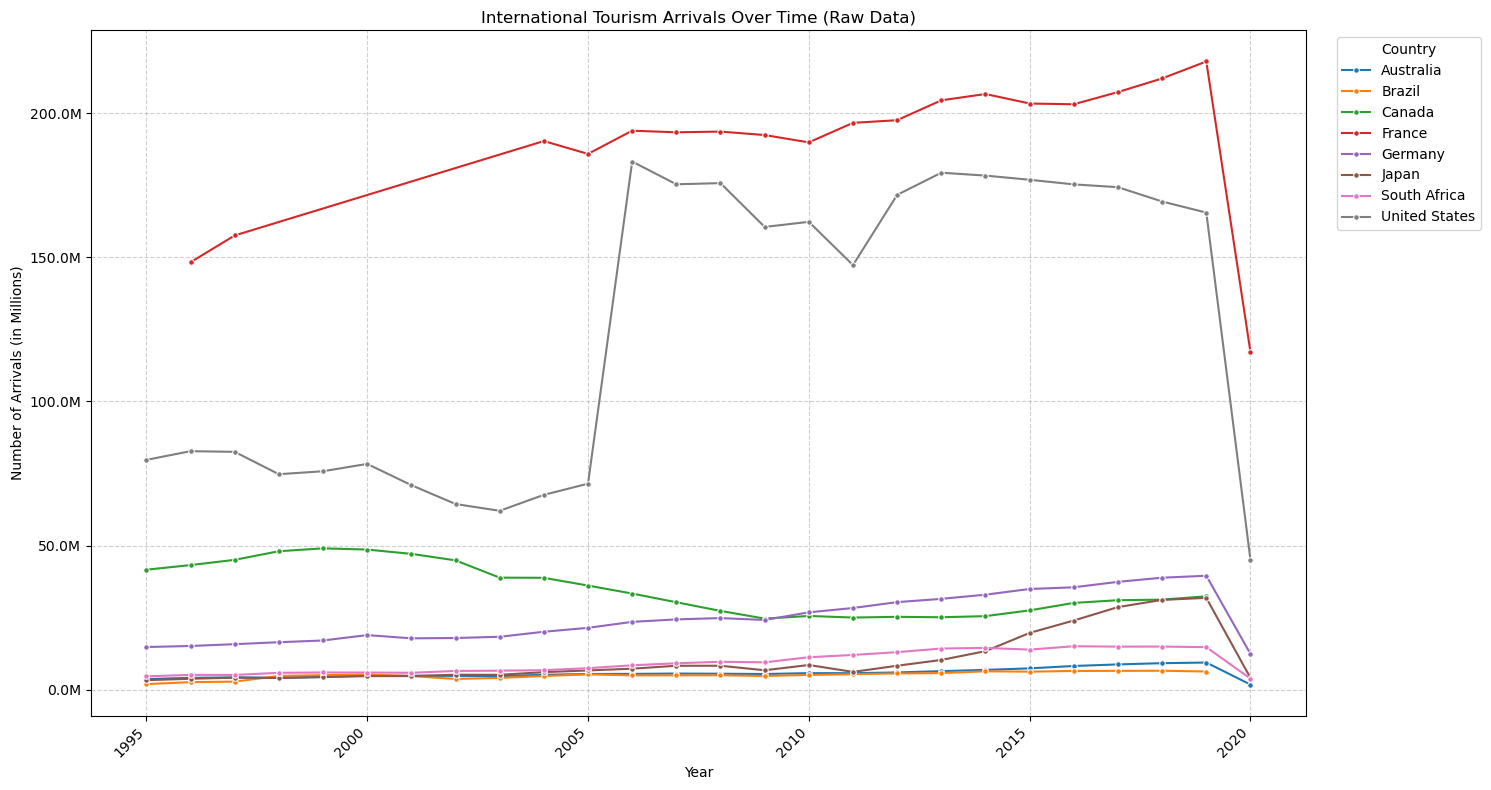

In [17]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Define the list of countries using their 3-letter ISO codes ---
country_codes = ['USA', 'CAN', 'DEU', 'JPN', 'AUS', 'BRA', 'ZAF', 'FRA']
country_names = ['United States', 'Canada', 'Germany', 'Japan', 'Australia', 'Brazil', 'South Africa', 'France']

# --- 2. Fetch the raw data for all countries ---
df_tourism_raw = wb.data.DataFrame(
    'ST.INT.ARVL',      # Tourism arrivals indicator
    country_codes,      # List of countries
    time=range(1990, 2025),
    labels=True
).reset_index()

# --- 3. Reshape the data from wide to long format ---
df_tourism_long = pd.melt(
    df_tourism_raw,
    id_vars=['economy', 'Country'],
    var_name='year',
    value_name='tourism_arrivals'
)

# --- 4. Clean up the data ---
df_tourism_long['year'] = pd.to_numeric(df_tourism_long['year'].str.replace('YR', ''))
df_tourism_long['tourism_arrivals'] = pd.to_numeric(df_tourism_long['tourism_arrivals'], errors='coerce')
df_tourism_long.sort_values(['Country', 'year'], inplace=True)


# --- 5. Create the line plot ---
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_tourism_long,
    x='year',
    y='tourism_arrivals',
    hue='Country', # Use a different color for each country
    marker='o',
    markersize=4,
    palette='tab10'
)

# --- 6. Format the plot ---
# Format Y-axis to show millions
formatter = FuncFormatter(lambda y, pos: f'{y / 1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('International Tourism Arrivals Over Time (Raw Data)')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Looking at raw data, it appears US changed the way it counted tourists from 2005 to 2006, which probably better reflects how other countries count since pre-2006 US only had 50% more tourists than Canada and post-2006 it almost matches Frances tourism numbers which has the highest tourism accourding to several sources. Also, there is no data after 2020, so cant see how tourism recovered post-pandemic

--- fg_population ---


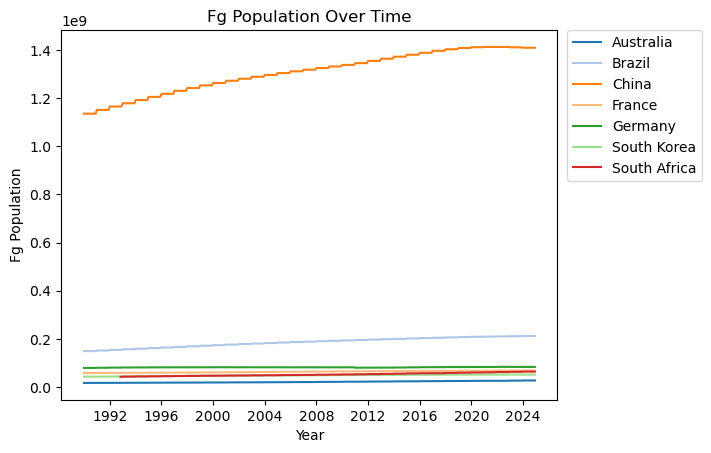

--- fg_gdp ---


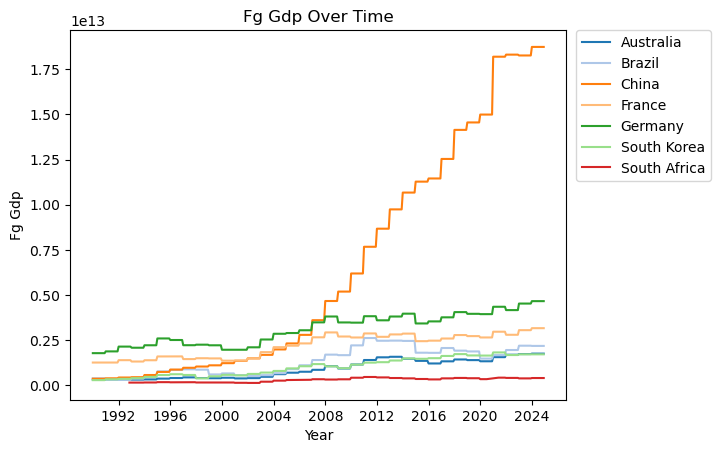

--- fg_gdp_per_capita ---


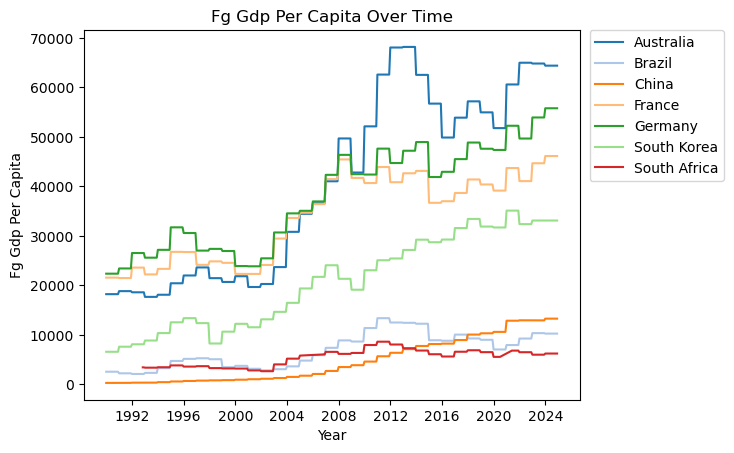

--- fg_trade_pct_gdp ---


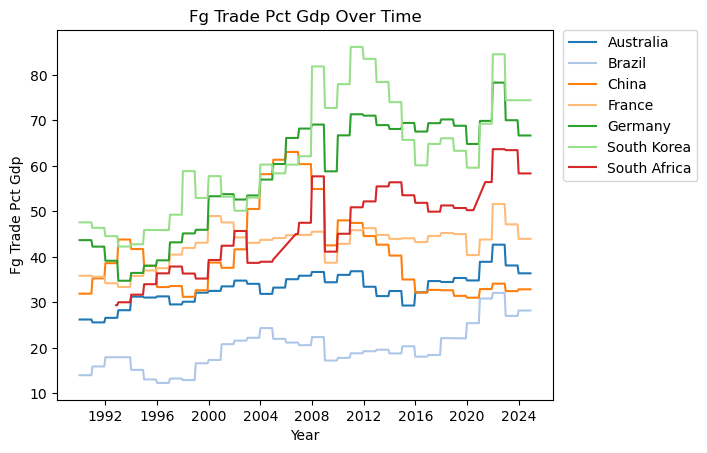

--- fg_tourism_arrivals ---


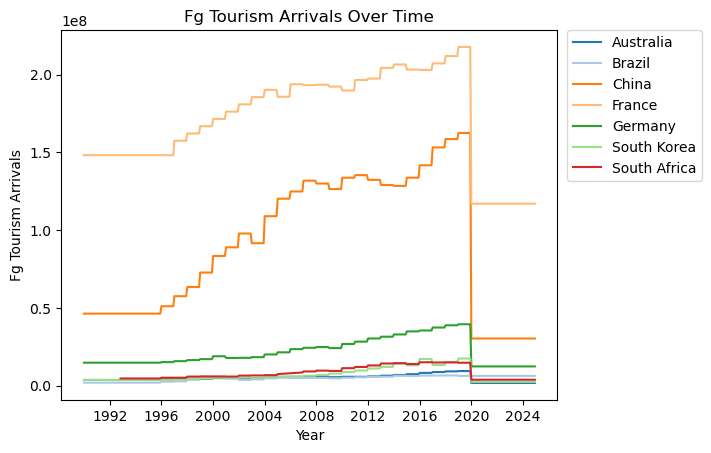

--- fg_remittances_paid ---


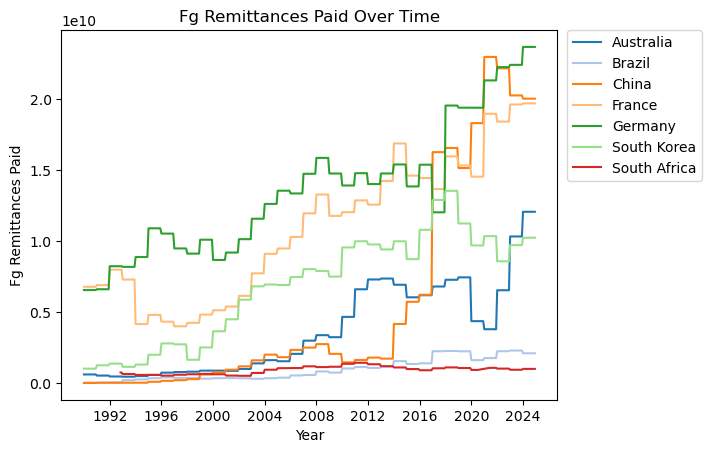

--- fg_remittances_received ---


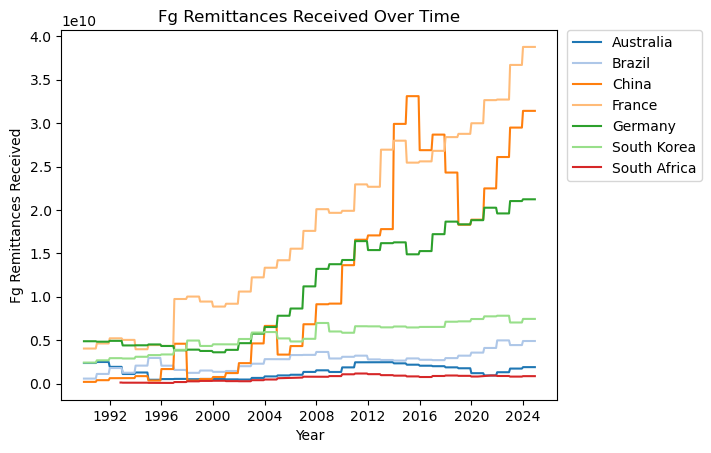

--- fg_inflation_cp ---


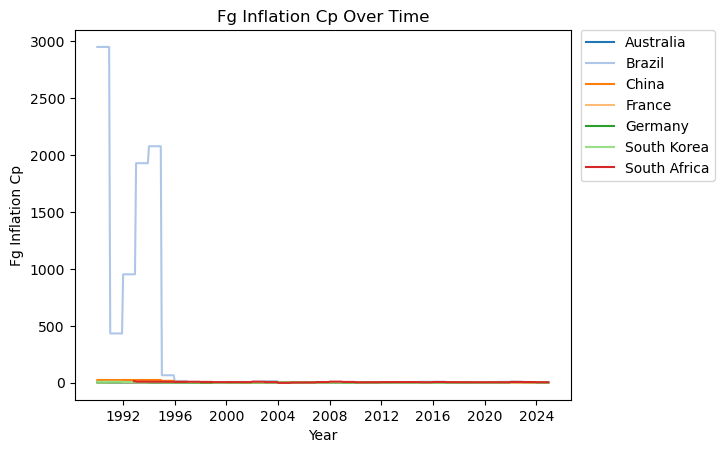

--- fg_air_departures ---


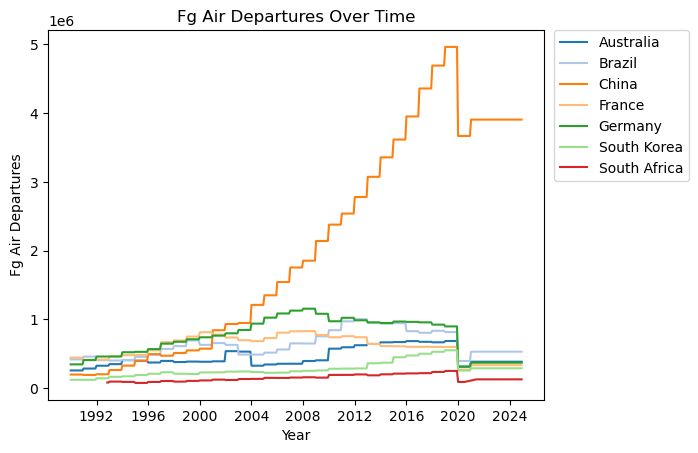

--- fg_USD_exchange_rate ---


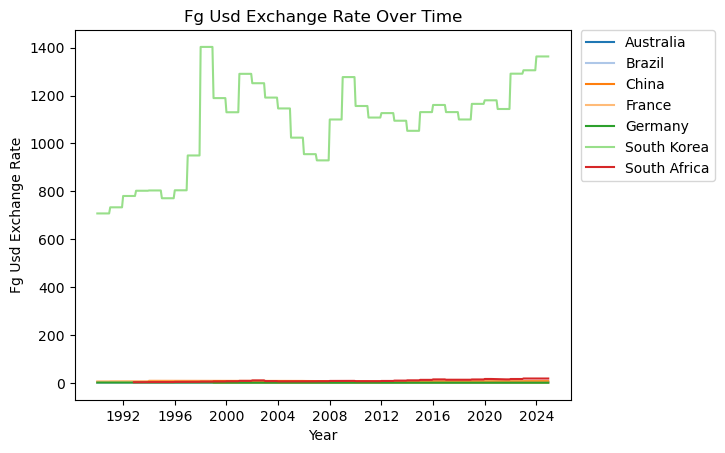

--- jet_fuel_price ---


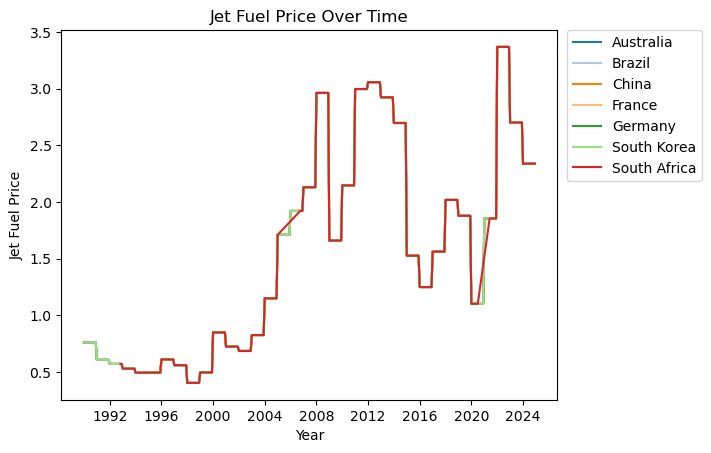

In [18]:
for wb_col in ['fg_population', 'fg_gdp', 'fg_gdp_per_capita', 'fg_trade_pct_gdp', 'fg_tourism_arrivals', 
               'fg_remittances_paid', 'fg_remittances_received', 'fg_inflation_cp', 'fg_air_departures', 
               'fg_USD_exchange_rate', 'jet_fuel_price']:
    print(f"--- {wb_col} ---")
    plot_df = df.loc[df.fg_iso_country.isin(['AU', 'BR', 'CN', 'FR', 'DE', 'ZA', 'KR'])] \
        [['data_dte', wb_col, 'fg_country_name']] \
        .drop_duplicates().groupby(['data_dte', 'fg_country_name']).mean().reset_index()
    sns.lineplot(data=plot_df, 
                 x ='data_dte', y=wb_col, hue='fg_country_name', palette="tab20")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.title(f'{wb_col.replace("_", " ").title()} Over Time')
    plt.xlabel('Year')
    plt.ylabel(wb_col.replace("_", " ").title())
    plt.show()

## Redoing the interpolation of missing data should be redone since post-2020 data doesnt seem trustworthy and some countries don't have data for some years